In [9]:
import csv
import numpy as np 
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt 
import pickle
import statistics
import numpy as np  
import sys

pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 200)

In [10]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

**Sentiment Analysis provided by Upasana - Tweets need to be cleaned prior to using.**


In [12]:
def sentiment_analyzer_score_for_englishOnlyTweet(cleaned_tweet): #this function takes in a tweet that has been detected as an english tweet
    score = analyser.polarity_scores(cleaned_tweet) #so this cleaned_tweet is always an english tweet.
    lb = score['compound']
    return lb

**Read in list of users to analyze**

In [13]:
# df = pd.read_csv("/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/DidNotMentionBack_Users/Filtered_EnglishUsers_DidNotMentionedBackUsers_FINAL.csv")
# # temp2D = pd.read_csv(, low_memory=False)

# # df = pd.read_csv('Filtered_EnglishUsers_DidnotMentionBackUsers.csv')
# UserList = list(df['Users'])

In [14]:
df = pd.read_csv("/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/DidNotMentionBack_Users/Filtered_EnglishUsers_DidNotMentionedBackUsers_FINAL.csv")
# temp2D = pd.read_csv(, low_memory=False)

# df = pd.read_csv('Filtered_EnglishUsers_DidnotMentionBackUsers.csv')
NonResponsiveUserList = list(df['Users'])

df = pd.read_csv('Filtered_EnglishUsers_DidnotMentionBackUsers.csv')
UserList = list(df['Users'])

for i in range(len(UserList)):
    NonResponsiveUserList.append(UserList[i])


In [15]:
print(len(NonResponsiveUserList))

4368


In [16]:
all_user_lists=[
    "/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/DidNotMentionBack_Users/Filtered_EnglishUsers_DidNotMentionedBackUsers_FINAL.csv",
    "/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/MentionedBack_Users/Filtered_EnglishUsers_MentionedBackUsers_FINAL.csv",
    'Filtered_EnglishUsers_DidnotMentionBackUsers.csv',
    'Filtered_EnglishUsers_MentionBackedUsers.csv']

UserList = []
userPathDict = {}
for i in range(4):  
    df = pd.read_csv(all_user_lists[i])
    tempUserList = list(df['Users'])
    for j in range(len(tempUserList)):
        UserList.append(tempUserList[j])
        if (i == 0) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'
        elif (i == 1) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'
        elif (i == 2) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/OnlyEnglishTweets/'
        elif (i == 3) : userPathDict[tempUserList[j]] = '/home/updu6059/Twint_Data/ParallelProcessing/OnlyEnglishTweets/'
    

In [17]:
UserList = ['foreignoffice',
 'johndjohnsonusu',
 'ScottFordTVGuy',
 'TherealTaraji',
 'CarlaMcClanahan',
 'zachhaller',
 'realPolitiDiva',
 'austinkeller',
 'tamarindlemur',
 'maxzmorrison',
 'hashtagnpisces',
 'LBaconBlood',
 'rocketmanxl1',
 'paddyconjo',
 'alienmagicman',
 '_queazy_',
 'SemeiMuCasa',
 'scottwilks',
 'LahdeeDot',
 'AuspiciousAei',
 'mojoe4usa',
 'DadManTweeting',
 'KerrySeghers',
 'enilmurd',
 'Markedby7',
 'foureyedfun',
 'VaporKing',
 'SusannaKLeonard',
 'Jaheal_',
 'budgieofdespair',
 'cbishop1412',
 'EvilMaria1',
 'Esq95Flavorflav',
 'CaptainNeil96',
 'Dieselwon2012',
 'rahulvpisharody',
 'xMangoIceeT',
 'gingaaajess',
 'DougGillespie7',
 'FateJacketX',
 'judgecraters',
 'malcolmthekid',
 'PresidentJeffPJ',
 'TheSoundDefense',
 'manniefeathers6',
 'Marlo_riz',
 '50svampy',
 'FunnyPantsTV',
 'nandibeee',
 'lokikittie',
 '720js',
 'RookieScripts',
 'kimbafuzz',
 'ajbecker73',
 'z1y2x3',
 'Evilsnail1',
 'FREEEDOOOOOOOM',
 'AyoRetOfficial',
 'ritewords',
 'SirMikeSaLott',
 'jeffool',
 'OMFGitsNINJAx',
 'yimnotsmart',
 'JohnisRight43',
 'nathansoz',
 'AnointedJazmane',
 'Jm3cooper',
 'Red_Mage23',
 'killamatthew',
 'Lady_Ajax',
 'CSAviate',
 'iRocKeT1391',
 'NorthOnSixty1',
 'FreedomUSA4',
 'Atkyjason',
 'Bonedoc51',
 'lisakayemundy',
 'CallumCH98',
 'taramoredew',
 'thewonderwheel',
 'MyLittleGarrone',
 '1962Kiser',
 'TheLampshades',
 'andrelevine',
 'Sunny_Day2222',
 'EqualMusicFacts',
 'BigChaun',
 'Steeeeeeeevens',
 'JoAsYouKnowIt',
 'crudberry',
 'Francis_Marion_',
 'BigEnuff',
 'TheChadMoore',
 'capricornbt',
 'jmarshall8211',
 'tackertfg',
 'Rell_Lauren',
 'DishyIndianGuy',
 'ThisSideOp',
 'MrMostDaysOff',
 'TheFemaleMorman',
 'gaydybunch',
 'J010011113',
 'Chomes',
 'NormanLinnell',
 'pickupjaxi',
 'Turrtles1966',
 'E_akoji',
 'JWr1ghtBra1n',
 'Under6ftNoBeard',
 'buzzyiswhat',
 'Natasza_l',
 'BlackMASSATTACK',
 'suziwithaq',
 'MarkMontag',
 'caseysherman123',
 'DylanMernagh',
 'A_Rockas',
 'llennirG_nosaJ',
 'Michael_Rose',
 'EddiefastEdh',
 'masoncurtisjr',
 '201campbell',
 'ItsMeMandiC',
 'nuunnyyaabbiiz',
 'mindofamuse',
 'AmbahInvasion',
 'LJChiov',
 'drewshane',
 'Pinestraw2016',
 'grave_acid',
 'Rockzawesome',
 'DeafRanger',
 'SuperbCr0w',
 'GahBr0wnTZ',
 'spiffydion',
 'Noel_T10',
 'CoffeeNTrees',
 'MrDarceysWife',
 'travtuck69',
 'ReasJack',
 'HighHighHighhh',
 'cbeelman',
 'tylerkilledit',
 'RamitMastiHFSC',
 'SocrateezNutz',
 'Idekbutyo',
 'jrvirden',
 'nancymancias',
 'WerIstDeinPa',
 'Awesomeismehb',
 'Oryx19Rick',
 'SishirChetri',
 'graarchen',
 'Pandablac260',
 'antiqueboy',
 'hootmami',
 'starsandgoggles',
 'BetteGaeDart',
 'mythreerules',
 'whoseywhatsit',
 'FoxFixx',
 'schlongitude',
 'Maria_Besos',
 'LeilaNavidi',
 'DarkChocolateAO',
 'ThomasJLowe1',
 'theraglandpage',
 'wsmith825',
 'trickstergod',
 'simpsonsgame13',
 'parrotbay2',
 'KookyIsabelDust',
 '72Conti',
 'OrdQuelu',
 'thebrowncyde',
 'InfernalWheel',
 'elmonalissa',
 'W_Traff',
 'Reezlie',
 'Marie_from_CA',
 'danmanns',
 'mmendo',
 'JaniceKayePhD',
 'vindserwome',
 'Jarose215',
 'triboulet',
 'xrabz',
 'Benderbr_rb',
 'Hereditarian98',
 'NotEnoughHands',
 'SweetLifeCo',
 'EunuchWang',
 'Dawnavette',
 'Shewrites80',
 'DolceNicole_',
 'KayO57558049',
 'PinxThinx',
 'Bella_Famke',
 'ciaran_76',
 'fzero2245',
 'rapebombing',
 'ShawtySuppaBad',
 'tschumann8',
 'Just1MoreAshley',
 'Carl_Stawicki',
 'mosaicgraffiti',
 'TJDVET',
 'TotallyFrustrat',
 'JustPeachieInGa',
 'burnersltd',
 'LadySpeech',
 'CZabielski',
 'Dementropy',
 'AngerMotivates',
 'NYRangersss',
 'MrReaLs1',
 'adgarcia86',
 'neilnagraj',
 'LesaPamplin',
 'LindaDavies915',
 'maryxthi',
 'IAmKrissyBrown',
 'bmarsh31',
 'BarryMurphyPT',
 'fatalmocking',
 'MButtreaks',
 'iSAL9000',
 'staylow_ki',
 'SloantheImpaler',
 'breal372002',
 'wolfpsy',
 'Seallion',
 'Freedomoffreedo',
 'cardsrockn',
 'TACP_TICK',
 'BrooksBorough',
 'miss_sonya_miss',
 'hmharper',
 'BLMUpstateNY',
 'kharizzmaaa',
 'RichFlint1',
 'trustymachete',
 'redKheld',
 'angibby22',
 'jules70uk',
 'gingerwitchy',
 'Dirty_Water',
 'BmoreBirds88',
 'zardoz_x',
 'Johnson4Georgia',
 'Renathy777',
 'jennneverjennie',
 'EmmaGB90',
 'kan_solo',
 'himynamesjordan',
 'trlawlor',
 'jester_60',
 'treedoesstandup',
 'JerryLe27102489',
 'BertSwattermain',
 'xcdntlcsmnt',
 'LaurenceNichols',
 'BillLefty',
 'angelrose9392',
 'ForkTongueRoad',
 'ravensky311',
 '_InnocentAsh',
 'hatesec',
 'Dcarter888K',
 'CodyKyle1776',
 'ubercrude',
 'KeiSyghThomas',
 'tweetmicka',
 'MichaelKnutzen',
 'MichaelClear',
 'KevinKautzman',
 'Cameron0047',
 'RIPacheco79',
 'heartsngems',
 'itsmebrock',
 'AnastasiaVitsky',
 'CKB35',
 'leafroe',
 'dognosemedia',
 'RealKaffo',
 '_Ali__B',
 'OneYoungsta',
 'vinniekniffen',
 '1200CreativeInn',
 'scrobTV',
 'Mason8777',
 'richkingbeom',
 'hollyrusak',
 'LindaLKaiser',
 'MAGAKlynne',
 'SlickRich22',
 'ImpactImagz',
 's_iraa',
 'JasonXtron',
 'theAmphitrite',
 'Cannabismuth',
 'monkey12_evil',
 'Infieldplayer',
 'Jacob_Moore92',
 'issadebbiecak',
 'GameMasterFTW',
 'dilemma_pirate',
 'anatlasofclouds',
 'BeingJeneen',
 'SAN_PELLEGR1NO',
 'redallover99',
 'kronk64',
 'KeswickPinhead',
 'babyshmay',
 'georgebarnes311',
 'tonylyons132',
 'thatblondeasian',
 'NdcntExposure',
 'georgetses',
 '_Apryll_',
 'NewNatTurner',
 'anna_bags1',
 'serenity82108',
 'Geminice',
 'fsalas19441',
 'buzzsaws1',
 'KollanKolthoff',
 'JohnPierreMaeli',
 'earthskywater43',
 'trapmasterrick',
 'teresegilmore',
 'kingpenonsight',
 'ObatalasImage',
 'tatiyanaaa__',
 'jthurgood1',
 'catheternebula',
 'S_a_r_a_h_____',
 'G2Esquire',
 'chargis',
 'kencsmith5',
 'EarlNoahBernsby',
 'EirolltheThird',
 'O_Muhfacinhair',
 'fahadyo',
 'Call_me_Vari',
 'TMF_the_Artist',
 'HotmaiBill',
 'daisy_maybe',
 'Lady_Berde',
 'goddess_xo1',
 'RichGLarkin',
 'DarknessRandom',
 'Setting4Success',
 'RiamuCelestrian',
 'A_Independent_',
 'DarthVoorhees',
 'ElastiPantGirl',
 'jfredrick99',
 'akhi216',
 'barlondsmith',
 'Dakim1960',
 'meinherr',
 'tuns1999',
 'tr_wildebeest',
 'Geechi_Luciano',
 'Partyof2020',
 'TimeHipster',
 'police_judo',
 'wolfofariosophy',
 'cp110374',
 'Hermius1',
 'lowkeysarraa',
 'DJSHORT_DA_GR8',
 'tellahtruth',
 'MatCostin',
 'davidtennunt',
 'scar1etbeg0nias',
 'ginger_bread78',
 'cauldronofwords',
 'cheko411',
 'FunkyGoon',
 'Snax5thAve',
 'kristianstout',
 'BibsWWPD',
 'ThreatSuppress',
 'sherylbarrel27',
 'kingsfanone',
 'VicGrundy',
 'huge_organ',
 'patsyrn63',
 'CatoPodcast',
 'ayres_scott',
 'Adore_dess',
 'seomac',
 'QCExaminer',
 'T_totheDon',
 'JeffMcIrish',
 'sandnseaOR',
 'sf_anastasia',
 'david_marcelis',
 'stonekoldsoul',
 'majorjds1963',
 'fdamore5055',
 'couerfidele',
 'Holdenmagroin75',
 'pvaras',
 'HomeDefinitely',
 'TamilynLove',
 'dr_ashok_m',
 'codeineolajuwan',
 '6thgentexan',
 'adu1tg33k1',
 'VictorLicata1',
 'Damien_C76',
 'Dwanders39',
 'iamgregbach',
 'rhonlirob',
 'brownsugarkiss7',
 'krodNM',
 'donna_jean4',
 'LauraDSteel',
 'ruthie56',
 'ThatJCStoneking',
 'MilosParrots',
 'clivec71',
 'brittanie_lewis',
 'LeahCF',
 'gyus777',
 'turnie3',
 'TheBossman102',
 'ByNatalieKaplan',
 'attorneyDBK',
 'biigboy777',
 'BryanBurton6',
 'nowhere_nh',
 'GregorHiggins',
 'tracyisland6',
 'redorcno9',
 'CaptainKilt',
 'ThePiyushGoyal',
 'DGSeason',
 'Carma_2012',
 'WesleyStierwalt',
 'OilegorAerep',
 'NorthVanMike',
 'Sensei_DaveBear',
 'DreamersNevrDie',
 'yosoysof_',
 'sskip800',
 'IHeartFinishLns',
 'anti_leftist_TX',
 'uniquelyphilly',
 'smule77',
 'Dasserz_',
 'aguynhi',
 'Schmiffy12',
 '13374',
 'LeaguePassGod',
 'FupaFairy',
 'nlgraham1',
 'CrunkPopeye',
 'VakeyVakeyBaby',
 'DavidTorres1235',
 'LelJoyce',
 'owhy3',
 'Josramey78',
 'The_RealWheel',
 'RexDangerSeeker',
 'chipman_victor',
 '__ninasimone',
 'Tufftruth',
 'brumsky3',
 'M_GilliamPrice',
 'NetDep911',
 'robertzilch',
 'RichGustason',
 'Shartacular',
 'toothpste4dinnr',
 'Yorkdel',
 'RJ13835606',
 'mamo_0n',
 'Nephanor',
 'eddved11',
 'MostUnfollowed',
 'lw2062',
 'jerome559',
 'tyarrum77',
 'sweetnigg1',
 'Flying59Vette',
 'AshyVandross',
 'lolofl30',
 'AchaevaAlena',
 'dustbury',
 'lorenagonz15',
 'jaewiki',
 'MandyBurgess246',
 'pauljameslong',
 'mdsbarry',
 'ellenfatale_01',
 'KdubSoSolid',
 'ripwupri',
 'Ant628',
 'EdB_Ohio',
 'MariePVilla',
 'drsarangbani',
 'kstrong_',
 'ItsMeNateG',
 'dickersnoodles',
 'deSouza_palooza',
 'MichelleyM',
 'payshel',
 'WorkWithKirk',
 'pilgrimapu',
 'simply_tyy',
 'elwhyessayy',
 'bluefireify',
 'SourlemonStr220',
 'Mr_NixNetwork',
 'IAMJohn_Harrell',
 'sky_skye',
 'ItsJaleelYoung',
 'dejanayb18',
 'sjrw',
 'GaelicGolfer',
 'UltimaOla',
 'iJonesYou',
 'fugitive247',
 'BGWhite42',
 'Jess_Mugford',
 'a_cold_rain',
 'KYWrangler',
 'BlueJayXXII',
 'amandasmalll',
 'DarinKingIsMe',
 'MNF_Miracle',
 'TheTheGrinch7',
 'CapLarryDart',
 'Fenominelly',
 'bosshog2477',
 'JediBeagle1',
 'JerryJurski',
 'DarthKoolaid',
 'SParkRabbit',
 'Piquerish',
 'LindaBitchery',
 'amjay718',
 'GiftedPrude',
 'SandwichKing420',
 'Beamer_6412',
 'HowitzerDoogie',
 'SeveChambers',
 'DanielleArce',
 'Size_Queen1123',
 'Kaye_Langa',
 'LakotaDashing',
 'jack_ryan6',
 'Demps283',
 'YoMomBlewMe',
 'kingdominathor',
 'annareynoldsss',
 '_SliimCity',
 'LatinaforTrump',
 'samdezzy43',
 'JewsMatterToMe',
 'DOJSuedFerguson',
 'uknbama',
 'Anmiri',
 'Mashugana_Kat',
 'BBrad114',
 'randybruin8',
 'chini_linguini',
 'JoeBobBoy',
 'DogsOfSample',
 'emokmich',
 'SamIsGonzo1978',
 'rosaroja4rev',
 'MissFuzzball',
 'jimmy_tuckler',
 'OlgaRyss1',
 'ElPenguinito',
 'J_Trav2',
 'nollaigkelly',
 'EveaFrank',
 'storminmom',
 'DivaLoyal1',
 'XFilesAndAll',
 'JPanton2',
 'FjeldDr',
 'BewareTheFurry',
 'SoapParker',
 'Apodcalypse',
 'DjamesScanlon',
 'Sully21',
 'AposticMark',
 'Americans4Ever',
 'FlamingJessi',
 'willd013',
 'BassmanDave84',
 'ishyyg17',
 'Parnellart',
 'TheRealChris_C',
 'Peter_BBB',
 'AkhmedZakayev',
 'noivad',
 'PossiblyGuilty',
 'Edward_Tafel',
 'viannahlee',
 'longbeachjorge',
 'EgotasticFT',
 'TTino_boi',
 'CaseShuff',
 'TedMurray53',
 'kdroyce',
 'TifeTheBawse',
 'Browneyes_2060',
 'TheNewCentristx',
 'JohanIsTweeting',
 'breitbartis',
 'NvrSurrender101',
 'w1seone25',
 'topknox',
 'Megreg916',
 'verycosmic',
 'brianbyrne1',
 'yarnchick40',
 'Billstannard1',
 'GenesisGulley',
 'Us_Veteran1971',
 'kylorsparks',
 'EUFundedEUTroll',
 'iamshetoo',
 'DaRiddler_79',
 'MaxineGridi',
 'TheSchwartz65',
 'HaleBurro',
 'danilynnguess',
 'hashtagnow_co',
 'thecoolnoodle',
 'jaredshroyer',
 'JamTheMighty',
 'LidiaPedro9',
 'hyperion5182',
 'Winking_Buddha',
 'cyber_merkin',
 'JayomegaSO',
 'barney121257',
 'uncletypewriter',
 'Bahai144',
 'StinkyandEddie',
 'ImagnryFriend',
 'leastactionpri1',
 'JS4kix808',
 'robin_nohood',
 'StevenEveral',
 'basedmex',
 'angry_eyebrowz',
 'LuciusMestrius',
 'BrendonWScott',
 'jasonlefthand',
 'KiriLaurelle',
 'Civil__Civilian',
 'CaptnTghtpnts',
 'Vann13Michael',
 'GilliamReport',
 'MackDFinesse',
 'WeakNeckBaby',
 'LillianLaRoux',
 'dtgriffith',
 'davidlynch1983',
 'Melissa_Dance',
 'joedelaplaine',
 'Mangy_Dog',
 'ThinkDoProgress',
 'BuddySaanGuy',
 'AlanHazer5',
 'King__Dork',
 'Conservative220',
 'ReallifeHorror',
 'wetheppl9011',
 'LavadomJosh',
 'CommieCrusherJM',
 'TuttlePatriarch',
 'Assata_Syllabus',
 'JamesRogers70',
 'Edwardjns22',
 'vickyeh',
 'alexrioscomedy',
 'BeautifulLuvfly',
 'DJSuchandSuch',
 'dwlinzy',
 'BlagoPenev',
 'dryfter_',
 'citizenjaney',
 'michellechick79',
 'Sweetiepiee',
 'youzoob',
 'scaglioned',
 'UILFRONTLINE',
 'aliguduf',
 'jgb6791',
 'fromgroundlevel',
 'AyeWillComp_AtU',
 'DOOGZ1888',
 'Smith_Bill',
 'TrollingPostbox',
 'JD_Snapps',
 'manslaper',
 'R3nmari3',
 'PeteMaes',
 'DimwittedGenius',
 'Shocko22',
 'StangerRaymond',
 'glmacias',
 'johnnyscar',
 'WendyEJohnson',
 'UncleHubie',
 'capostatus85',
 'CininNewH',
 'LarryBridges8',
 '_RevRun',
 'ImACultHero',
 'DarkDanielV',
 'whereswally77',
 'Nanbp',
 'AlpertDC',
 'felicito15',
 'SianissSia',
 'JohnsonOpha',
 'Nathanpehler',
 'n00dle123',
 'Rayatbragg',
 'Ridnarhtim',
 'TACOPSBILL',
 'ArtfulRaptor',
 'b4AllB4wefall',
 'Contendment',
 'BuckeyedFella',
 'lvdjgarcia',
 'Luna_chick1222',
 'LastVerse66',
 'JullianneNYC',
 'JamesMorgan92',
 'CinciaxStONED',
 'RanaeMayle',
 'DrewtimusPrime',
 'CynicalityLord',
 'RocknLox',
 'YepWBK',
 'kuzco890',
 'pdq30111',
 'opph20',
 'truthophobes',
 'DonsFancyHanky',
 'schofey27',
 'ashjoy8',
 'CherokeeBaron',
 'JilliSizzle',
 'missbrimo',
 'FaithFortune99',
 'PosobiecMedia',
 'AnnaCohenZodek',
 'FirstName_Ant',
 'gppart',
 'flsaltlife791',
 'Gyropitus',
 'Truth_Dosage',
 'genvruiz',
 'SenseiSmyla',
 'kirakeeton',
 'jcpeanut2345',
 'nlgill26',
 'logancummins',
 'MagNorthTravel',
 'fedbizop',
 'Artwo23',
 'CuriousToo',
 'RebekahFCastro',
 'atomicladybug',
 'ProfClown',
 'peaceofclay890',
 '_Beezo__',
 'iamkillerpinky',
 'Cr4yCr4yF1sh',
 'lmilziz',
 'MissSchliez',
 'JamFlint',
 'St0neC0ldSt0ner',
 'FigFletcher',
 'ipox77',
 'OnMahThrone',
 'Diego_the_Artis',
 'MattMaybray',
 'Kimllg88',
 'thegayshay',
 'GLHStpUSA',
 'N4BWR',
 'eileenmjames1',
 'Ferrarisima',
 'JosieMagee',
 'DaLuckyOne1',
 'hulmesville',
 'Kympocalypse',
 'AleksandraRoze3',
 'sec1968',
 'Anashizzle',
 'PeterWolfffff',
 'Janna30150015',
 'quietpsalmist',
 'ISGTOM',
 'Hoagnation',
 'TalkCritic',
 'Jaystew17',
 'Takingover4da99',
 'LonesomeRich',
 'NationalismYes',
 'jimeall1',
 'Lupinfan83',
 'watermelondriia',
 'elinptr',
 'VetsSpeakOut',
 'mur06067673',
 'Mr_Frump',
 'mypostdemise',
 'Donwhitmore',
 'PalisadesKid',
 'deathofcivility',
 'nick_lalou',
 'tinkerbell9466',
 'makingsense136',
 'SFR_UMD',
 'EyesRealWorld',
 'ventivents',
 'robind1208',
 'QQBeautifulDove',
 'MissBella_J',
 'TrustedTrevor',
 'MEChannelLive',
 'WeCave_',
 'llJOSEPHXll',
 'boom_damn',
 'MsEBL',
 'psdaskas',
 'NoEmptyTalk',
 'adamoc132013',
 'DeeNoOne2U',
 'JoshDeMaria',
 'Kristopher_eric',
 'ftalke',
 'sagebrushphilos',
 'Washiepoo187',
 'DucAbrahamson',
 'WoodSide3412',
 'carlettaisgreat',
 'AliciaBeck20',
 'BSaysWhatIsReal',
 'kligup53',
 'SpanoChris',
 'PageWallace',
 'AMR736',
 'BeKindHumans',
 'DarrenMc1899',
 'ErinWehrenberg',
 'chancifanci',
 'njsachi',
 'LackingStock',
 'PlayboyTino',
 'Bettiejune12',
 'divinerebel',
 'MURCHU_Designs',
 'it_is_ayo',
 'rush_simpson',
 'bfb123456',
 'iAmOLobo',
 'MysticHue',
 '_fly_on_wall_',
 'GreekSTL',
 'DavidPorkchop',
 'dayo1946',
 'CookiieAssassin',
 'BigMan_OnCampus',
 'rikroku',
 'abriviated',
 'miss___pretty',
 'BureenuhDuhh',
 'daveyesfan',
 'Black_Jack_KD32',
 'Sean_Bishop',
 'planetscanlon',
 'PaintCaliRed',
 'clay1973',
 'HassyPatassy',
 'Montaquetravel',
 'TheChrisShepard',
 'aritronaut',
 'jenn0142',
 'blacklibco2015',
 'A2DaWellZ',
 'KNDetweiler',
 'LetMicahDown',
 'luvu82brewcrew',
 'RobRichendollar',
 'ClementsRick',
 'Joe_Marcincuk',
 'whiskey_ginger1',
 'Kamdranicole',
 'BrianaDJones',
 'olearygav',
 'Nolawho',
 'BigJD1976',
 'hougentoglerb',
 'WinterTsar',
 'krishnan0021',
 'Poetic_Feel',
 'Chrisr292',
 'DosterJohn',
 'ECLMiller',
 'JeffBenton77',
 'AlabamaToday',
 'kearns_neil',
 'DJRev',
 'ClassAnoymous94',
 'dejavuallday',
 'NoPolSolution',
 '58Bjh',
 'DeepHurting1',
 'LongjohnJungle',
 'dave_kitchens',
 'alkebulan57',
 'NachoPotatoe',
 'DrewBlahBlah',
 'CharlesFreshly',
 'maskedvoyeur',
 'ron_raim',
 'Beaglebutt60',
 'MountainGuider',
 'MissDizzyRed',
 'DrakeVader',
 'David_Flett',
 'ReenieDiva',
 'lauraroslin7',
 'GenericZA',
 'DuncanIrish',
 'CraigMcKain',
 'DelGirlsHoops',
 'thedadproblems',
 'Its_What_I_Said',
 'My_Ooh_Maya',
 'damontyler88',
 'savouryvinegar',
 'jbclemson',
 'jaktariff',
 'BaadBudgie',
 'DuchessSandrena',
 'TweetItHowULive',
 'bigdog033',
 'needtoknowHim',
 'drtpayz',
 'commisurbator',
 'Twihka',
 'thesyc66',
 'aevancamp',
 'Zaetonatiffany',
 'MadelineOldBrk',
 'OhGawd13',
 'carolinebjerke2',
 '1boy2cups',
 '_iConfess',
 'GeorgeOrwellian',
 'CreatveMonster',
 'Gypsy7714',
 'Romey999',
 'rathernotsay',
 'AbuSumayyah100',
 'Fanny57',
 'mikehoitiou',
 'AskCaraMella',
 'SashieKool',
 'TheLadyofHarris',
 'AdedapoLinda',
 'FarMcKon',
 'halfblackrage',
 'Amber_Aquarius',
 'OldSchool1000',
 'AezhinAhrr',
 'LarryvilleLaw1',
 'rbw424',
 'Whatwasthat101',
 'xuan_chou',
 '330Kingish',
 'Bamac1318',
 'SaQuanJohnson2',
 'urbanwarrior67',
 'Barkvader',
 'RayvenShiann',
 'thoughtfloss',
 'Amber_1017',
 'Duendito',
 'SBumbarMalchow',
 'DorothySmith11',
 'DorineSez',
 'Trump2020Amen',
 'JasminBreezey',
 'jefiorentino',
 'sergiez',
 'rosea_tony',
 'maximepo1',
 'c14b1ffa8c7f4f2',
 'FritzColburn',
 'googergieger',
 'godofwine77',
 'Hindoongie',
 'Valkyrie_77',
 'main755',
 'MichaelzNewz',
 'Faganator',
 'Deplorable_PA',
 'KamenwatiY',
 'CigarDaisy311',
 'IEatQuisp',
 'Snuffy_Joe',
 'imemdoc',
 'markclark064',
 'brosemail',
 'Nix_km',
 'Prolifeldy',
 'bosseone2',
 'CubicVacuum',
 'jypseamoth',
 'BLACKlife585',
 'furyof1000sons',
 '27guwap',
 'MssyreeDay',
 'therightsarah',
 'James_E_Vining',
 'SunRaie',
 'Maine_Char',
 'cturtle31',
 'TheseLegs',
 'devinedeme',
 'mikkifrosted',
 'ultragunclub',
 'Musclecar42100A',
 'KDogg3000',
 'greenrotgut',
 'chieff_1',
 'MetalFloss',
 'terriah01',
 'pjdefilip',
 '12Chains',
 'Tbradshaw15',
 'sankofa_malik',
 'EminemsRevenge',
 'BrookLyn1825',
 'MelaninMonheaux',
 'QT_TheBlackGod',
 'Timsomor',
 'Ramazone2',
 'DRmhussain3',
 'Volunteer4Vets',
 '_bajan_',
 'MrP_TheDJ',
 'SusieNattibree',
 'jackassdad2',
 'grewvsteve',
 'QueenofDrkns',
 'YakkeWantanebe',
 'thenormalcy',
 'DC_Dickel',
 'rchayden',
 'marcody8',
 'unclejo',
 'Wind2Energy',
 'simeonamir',
 'onlyinyourtweet',
 'DayZeesNap',
 'sxesenior',
 'IngSocBob',
 'paulasaywhatnow',
 'Susans_Island',
 'eastvillagetwt',
 'ericsean467',
 'NRA_TacoBowl_MS',
 'xxoCHRISTIANA',
 'SkiWithC',
 '1Iodin',
 'mythousandfaces',
 'lkbhndyou_ha',
 'OpiniontdBlkGuy',
 'hitdogsholler',
 'solunarium',
 'MoaninMary',
 'Nightwind56',
 'moonlander56',
 'politicalseason',
 'UdvTANBgkh9NQth',
 'genericpanic',
 'mrtplunkett',
 'dianapereira771',
 'duxcomedy',
 'bsmaphd',
 'Tigereye2012Dr',
 'sweetgreensnowp',
 'SlimJim2123',
 'DaBlackMartyr',
 'RealJimsMommer',
 'IssaWhyms',
 'Rashad111609',
 'HumanitySpeak',
 'ohplzlol',
 'Steverobbins008',
 'KimEmsw09',
 'DoubleHAndI',
 'theusagirl',
 'Nyota_nuru',
 'DrYardSale',
 'Matt_Stefon',
 'TheDonaldsDolls',
 'shay_patrice',
 'mgmargarita7236',
 'justplncate',
 'Freebird72',
 'TheTerribleHook',
 'Sugarcubedog',
 'Gud_Bwa_Fon',
 'HeavenShaffer',
 'theJessiG',
 'nancymaewest',
 'cynthiarf_says',
 'erinamunson',
 'trojans444_love',
 'stopthstupidity',
 'HelmsRandy',
 'deadmauz',
 'GardenerMiss',
 'ACKibbi',
 'Seann_Pat',
 'RicardoCarolina',
 'CMcCafferty3',
 'Tide17Crimson',
 'Jax6655',
 'FRW3',
 'paymyrant',
 'Eric_Hanke',
 'sjbenson101',
 'Chi2SoCal2LV',
 'JaNaMaRiE52',
 'Dbright21',
 'SlothComics',
 'galenwade',
 'BloodlePoodle',
 'rarebearclare',
 'darkwatchers2',
 'msiamastar',
 'Eggoverlight',
 'SteveHausner',
 'karinza001',
 'Pamela836',
 'Hendo7179',
 'twanndagreen',
 'SirGoldenrod',
 'shandile',
 'moogacat',
 'unifycivilized',
 'gbsamples',
 'Quinntessence_',
 'jsfox8',
 'Peso_Marley',
 'tonyspats',
 'samdamon65',
 'Kos_Cars',
 'diasporaspear',
 'txdad',
 'blackflag_2012',
 'sephius1999',
 'Longtails53',
 'rvnhoose',
 'cointelpro_',
 'f1ghtsamurai',
 'UrbanRebel8736',
 'spacetoob',
 'mmayrising',
 'epsilona01',
 'mv_ninja',
 'boygirlwedding',
 'iloanya1',
 'BowiedipDe',
 'WhoIsGodDAMED',
 'ElmParkinson',
 'AFRICAisMankind',
 'CGates81',
 'Rokingm',
 'd3s3rtgypsy',
 'noreenjritchie',
 'BitterSonicsFan',
 'LinaLunaSparkle',
 'vk2hml',
 'Jesal03',
 'DRNAuthor',
 'Jacie249',
 'chillasia',
 'SovereignGuy',
 'randylichner',
 'MrDaveHudson',
 'cloudhidden2',
 'somanystyles',
 'MoMeetsAisha',
 'us3r_322',
 'MrsZiggy1988',
 'HornetStings',
 'Zacherydtaylor',
 'KChlip',
 'Milosobeselover',
 'Cajun_Manor',
 'Perserverance_',
 'AntwynetteH',
 'Shekina29292890',
 'KixAdams',
 'mattrohrbacher',
 'hairymelvin',
 'JudsonMcCulloch',
 'PineStumpSavage',
 'AndrewHiller',
 'MarcusPoliocus',
 'tacoeater',
 'KyGrifter',
 'kshllcenterpri1',
 'steeler1828',
 'MaryintheMntns',
 'MalcolmPNewton',
 'egoyibo55',
 'RealMTGod',
 'I_Luv_Thinkers',
 'trueladybug',
 'EmblematicShift',
 'I_am_not_E',
 'longgoneblond',
 'MaryJoLA',
 'SheniceSays',
 'MisteryQuene',
 'tlweng74',
 'Willys_Puddle',
 'ocblues',
 'trinitywright33',
 'LoveDomine',
 'TheatreAfrica',
 'RodisGod',
 'ZientakbBrian',
 'ctv556',
 'Clinkin53',
 'LamiaWaddy',
 'wishiwasatiger',
 'Bkvar2',
 'AmericanGriper',
 'DysonDoll',
 'TheBrofucius',
 'TexasTejano1',
 'gal_pilot',
 'Sheepdog4USA',
 'dr_mario_XXX',
 'its_all__fake',
 'WhiskeyTango325',
 'fiscalconserve',
 'studentveronica',
 'bstevewhite',
 'JimMcAl97307903',
 'LearnedCitizen',
 'Farenelli',
 'Palfrey17Daniel',
 'EngagedE',
 'hfdwhalers1',
 'geegimoto',
 'iGodPC',
 'Gentleman_John',
 'HeneNegasi',
 'tende_rhoni',
 'NoWeDontAccept',
 'warriorgal777',
 'youremadeup',
 'robynbmatthews',
 'VS12Loop',
 'IsetThorne',
 'coldredhorse',
 'smartass_girl',
 'Saucy_Sis',
 'WFABNetwork',
 'Aframerica',
 'Alllwftopic',
 'JSmith2o10',
 'LJS3322',
 'RedEyesWide',
 'DiogeneofSinope',
 'A_HopefulCynic',
 'SantaBrat',
 '1776LifeLiberty',
 'KiahDaddy',
 'EdwinKanu',
 'PatHartman_',
 'paula_carvin',
 'AdarAyiraViews',
 'Real_Julz',
 'TaylorTwo9',
 'nothankuuuuu',
 'robert737373737',
 'wandashelton94',
 'Awoww19XX',
 'PornPops69',
 'PirateJhon216',
 'DcStarlord',
 'LeeTwts',
 'hummysgmom',
 'jrmadmen',
 'CitizenDR',
 'SoarMich',
 'BeingBeeGee',
 'mashout3',
 'giatny',
 'Mintyminxy',
 'CatchlightAnne',
 'ChetPorter1',
 'cranes5',
 'amandahayeswil2',
 'Miryam1968',
 'mark7130',
 'jgibman',
 'HUMANBEINGONE',
 'AdvocatAmy1',
 'markfromalbany',
 'HakiimMusic',
 'marnes',
 'Chlanandria']

In [18]:
# UserList.remove('SecludedSusie')
# UserList.remove('ScottFordTVGuy')
print(UserList[0])
len(UserList)


foreignoffice


1331

In [19]:
# temp_user_db = pd.read_csv('/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'+UserList[i]+'.csv', header=None, low_memory=False)

In [20]:
# temp_user_db.head()

In [21]:
iraContactPoints = pd.read_csv('contact_IRAtoUser_Inf_NONRESPONSIVE.csv')
iraContactPoints1 = pd.read_csv('contact_IRAtoUser_Inf_RESPONSIVE.csv')
iraContactPoints2 = pd.read_csv('contact_IRAtoUser.csv')
# iraContactPoints.head()

**Create dict of contact points, formatted: username -> [list of contact points]**

In [22]:
iraContactDict = {}
for i in range(len(iraContactPoints)):
    
    temp_list = iraContactPoints['tweet_date'][i].split(', ')
    temp_list[0] = temp_list[0][1:]
    temp_list[-1] = temp_list[-1][:-1]
    for j in range(len(temp_list)):
        temp_list[j] = temp_list[j][1:]
        temp_list[j] = temp_list[j][:-1]
#     temp_list.sort()
    iraContactDict[iraContactPoints['username'][i]] = temp_list

for i in range(len(iraContactPoints1)):
    
    temp_list = iraContactPoints1['tweet_date'][i].split(', ')
    temp_list[0] = temp_list[0][1:]
    temp_list[-1] = temp_list[-1][:-1]
    for j in range(len(temp_list)):
        temp_list[j] = temp_list[j][1:]
        temp_list[j] = temp_list[j][:-1]
#     temp_list.sort()
    iraContactDict[iraContactPoints1['username'][i]] = temp_list


for i in range(len(iraContactPoints2)):
    
    temp_list = iraContactPoints2['tweet_date'][i].split(', ')
    temp_list[0] = temp_list[0][1:]
    temp_list[-1] = temp_list[-1][:-1]
    for j in range(len(temp_list)):
        temp_list[j] = temp_list[j][1:]
        temp_list[j] = temp_list[j][:-1]
#     temp_list.sort()
    iraContactDict[iraContactPoints2['username'][i]] = temp_list
    

In [23]:
for key in iraContactDict:
    temp_list = iraContactDict[key]
    temp_list.sort()


In [24]:
# for key in iraContactDict:
#     print(key)
#     print(iraContactDict[key])
#     print("\n\n")

**Functions to check for a mention of Donald Trump or Hillary Clinton in a tweet**


In [25]:
def mentions_trump(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'realdonaldtrump':
                return True
    return False

In [26]:
def mentions_clinton(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'hillaryclinton':
                return True
    return False

**Create new DataFrame, which will hold all before / after analysis date in the form of lists**

In [27]:
beforeAfterDF = pd.DataFrame(columns=['username', 'first_contact', 'second_contact',
                                      'third_contact','tweet_count','sentiment_scores', 
                                      'trump_count', 'clinton_count','trump_sent','clinton_sent',
                                      'positive_sent', 'negative_sent'])

In [28]:
befAftCounts = pd.DataFrame(columns=['username', 'before_tweetcount1', 'before_tweetcount2', 'before_tweetcount3',
                                    'after_tweetcount1', 'after_tweetcount2', 'after_tweetcount3',
                                    'before_trumpcount1', 'before_trumpcount2', 'before_trumpcount3',
                                    'after_trumpcount1', 'after_trumpcount2', 'after_trumpcount3',
                                    'before_clintoncount1', 'before_clintoncount2', 'before_clintoncount3',
                                    'after_clintoncount1', 'after_clintoncount2', 'after_clintoncount3',
                                    'before_sentiment1', 'before_sentiment2', 'before_sentiment3',
                                    'after_sentiment1', 'after_sentiment2', 'after_sentiment3',
                                    'before_trump_sent1', 'before_trump_sent2', 'before_trump_sent3',
                                    'after_trump_sent1', 'after_trump_sent2', 'after_trump_sent3',
                                    'before_clinton_sent1', 'before_clinton_sent2', 'before_clinton_sent3',
                                    'after_clinton_sent1', 'after_clinton_sent2', 'after_clinton_sent3',
                                    'before_positive_sent1', 'before_positive_sent2', 'before_positive_sent3',
                                    'after_positive_sent1', 'after_positive_sent2', 'after_positive_sent3',
                                    'before_negative_sent1', 'before_negative_sent2', 'before_negative_sent3',
                                    'after_negative_sent1', 'after_negative_sent2', 'after_negative_sent3'
                                    ])

In [29]:
# temp_user_db = pd.read_csv('/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'+UserList[0]+'.csv', header=None, low_memory=False)

In [30]:
# iraContactDict

In [31]:
# contact_list = iraContactDict[UserList[0]]
# first_contact = contact_list[0][:-6]

In [32]:
# contact_list

In [33]:
# iraContactDict

In [34]:
first_tweet_dict = {}
size = str(len(UserList))
for i in range(len(UserList)):
    if UserList[i] in NonResponsiveUserList:
    # for i in range(10):
        try:
            #create temp DF
        #         temp_user_db = pd.read_csv('/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'+UserList[i]+'.csv', header=None, low_memory=False)
            temp_user_db = pd.read_csv(userPathDict[UserList[i]]+UserList[i]+'.csv', header=None, low_memory=False)
        #         temp_user_db = temp_user_db.iloc[::-1]
        #         temp_user_db.reset_index(drop=True, inplace=True)

            #save first tweet date
            first_tweet_date = temp_user_db[3][len(temp_user_db)-1]
            first_tweet_dict[UserList[i]] = first_tweet_date
            #initialize values
            tweet_count = [
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
            trump_count = [
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
            clinton_count = [
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
            sentiment_scores = [
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
            trump_sent = [
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
            clinton_sent = [
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
            positive_sent = [
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
            negative_sent = [
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
                [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

            username = UserList[i]
            contact_list = iraContactDict[username]
            first_contact = contact_list[0][:-6]
            first_contact = dt.strptime(first_contact, "%Y-%m-%d")
            second_contact = None
            third_contact = None
            if(len(contact_list) >= 2):
                second_contact = contact_list[1][:-6]
                second_contact = dt.strptime(second_contact, "%Y-%m-%d")
            if(len(contact_list) >= 3):
                third_contact = contact_list[2][:-6]
                third_contact = dt.strptime(third_contact, "%Y-%m-%d")
            #iterate through all tweets
            for j in range(len(temp_user_db)):
                #year one check
                current_date = temp_user_db[3][j]
                current_date = dt.strptime(current_date, "%Y-%m-%d")
                difference = ((((current_date - first_contact).total_seconds())/60)/60)/24
                if(difference >= -372 and difference <= 372):
                    temp_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                    trump_flag = mentions_trump(str(temp_user_db[11][j]))
                    clinton_flag = mentions_clinton(str(temp_user_db[11][j]))
                    if(difference < 0):
                        if (difference <= -341 and difference > -372): #-12
                            tweet_count[0] +=1
                            if trump_flag: trump_count[0] += 1
                            if clinton_flag: clinton_count[0] += 1
                            sentiment_scores[0].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[0].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[0].append(temp_sent)
                            if temp_sent > 0: positive_sent[0].append(temp_sent)
                            if temp_sent < 0: negative_sent[0].append(temp_sent)
                        elif (difference <= -310 and difference > -341): #-11
                            tweet_count[1] +=1
                            if trump_flag: trump_count[1] += 1
                            if clinton_flag: clinton_count[1] += 1
                            sentiment_scores[1].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[1].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[1].append(temp_sent)
                            if temp_sent > 0: positive_sent[1].append(temp_sent)
                            if temp_sent < 0: negative_sent[1].append(temp_sent)
                        elif (difference <= -279 and difference > -310): #-10
                            tweet_count[2] +=1
                            if trump_flag: trump_count[2] += 1
                            if clinton_flag: clinton_count[2] += 1
                            sentiment_scores[2].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[2].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[2].append(temp_sent)
                            if temp_sent > 0: positive_sent[2].append(temp_sent)
                            if temp_sent < 0: negative_sent[2].append(temp_sent)
                        elif (difference <= -248 and difference > -279): #-9
                            tweet_count[3] +=1
                            if trump_flag: trump_count[3] += 1
                            if clinton_flag: clinton_count[3] += 1
                            sentiment_scores[3].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[3].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[3].append(temp_sent)
                            if temp_sent > 0: positive_sent[3].append(temp_sent)
                            if temp_sent < 0: negative_sent[3].append(temp_sent)
                        elif (difference <= -217 and difference > -248): #-8
                            tweet_count[4] +=1
                            if trump_flag: trump_count[4] += 1
                            if clinton_flag: clinton_count[4] += 1
                            sentiment_scores[4].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[4].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[4].append(temp_sent)
                            if temp_sent > 0: positive_sent[4].append(temp_sent)
                            if temp_sent < 0: negative_sent[4].append(temp_sent)
                        elif (difference <= -186 and difference > -217): #-7
                            tweet_count[5] +=1
                            if trump_flag: trump_count[5] += 1
                            if clinton_flag: clinton_count[5] += 1
                            sentiment_scores[5].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[5].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[5].append(temp_sent)
                            if temp_sent > 0: positive_sent[5].append(temp_sent)
                            if temp_sent < 0: negative_sent[5].append(temp_sent)    
                        elif (difference <= -155 and difference > -186): #-6
                            tweet_count[6] +=1
                            if trump_flag: trump_count[6] += 1
                            if clinton_flag: clinton_count[6] += 1
                            sentiment_scores[6].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[6].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[6].append(temp_sent)
                            if temp_sent > 0: positive_sent[6].append(temp_sent)
                            if temp_sent < 0: negative_sent[6].append(temp_sent)
                        elif (difference <= -124 and difference > -155): #-5
                            tweet_count[7] +=1
                            if trump_flag: trump_count[7] += 1
                            if clinton_flag: clinton_count[7] += 1
                            sentiment_scores[7].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[7].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[7].append(temp_sent)
                            if temp_sent > 0: positive_sent[7].append(temp_sent)
                            if temp_sent < 0: negative_sent[7].append(temp_sent)
                        elif (difference <= -93 and difference > -124): #-4
                            tweet_count[8] +=1
                            if trump_flag: trump_count[8] += 1
                            if clinton_flag: clinton_count[8] += 1
                            sentiment_scores[8].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[8].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[8].append(temp_sent)
                            if temp_sent > 0: positive_sent[8].append(temp_sent)
                            if temp_sent < 0: negative_sent[8].append(temp_sent)
                        elif (difference <= -62 and difference > -93): #-3
                            tweet_count[9] +=1
                            if trump_flag: trump_count[9] += 1
                            if clinton_flag: clinton_count[9] += 1
                            sentiment_scores[9].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[9].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[9].append(temp_sent)
                            if temp_sent > 0: positive_sent[9].append(temp_sent)
                            if temp_sent < 0: negative_sent[9].append(temp_sent)
                        elif (difference <= -31 and difference > -62): #-2
                            tweet_count[10] +=1
                            if trump_flag: trump_count[10] += 1
                            if clinton_flag: clinton_count[10] += 1
                            sentiment_scores[10].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[10].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[10].append(temp_sent)
                            if temp_sent > 0: positive_sent[10].append(temp_sent)
                            if temp_sent < 0: negative_sent[10].append(temp_sent)
                        elif (difference <= 0 and difference > -31): #-1
                            tweet_count[11] +=1
                            if trump_flag: trump_count[11] += 1
                            if clinton_flag: clinton_count[11] += 1
                            sentiment_scores[11].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[11].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[11].append(temp_sent)
                            if temp_sent > 0: positive_sent[11].append(temp_sent)
                            if temp_sent < 0: negative_sent[11].append(temp_sent)
                    if(difference >= 0):
                        if (difference >= 0 and difference < 31): #1 
                            tweet_count[12] +=1
                            if trump_flag: trump_count[12] += 1
                            if clinton_flag: clinton_count[12] += 1
                            sentiment_scores[12].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[12].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[12].append(temp_sent)
                            if temp_sent > 0: positive_sent[12].append(temp_sent)
                            if temp_sent < 0: negative_sent[12].append(temp_sent)
                        elif (difference >= 31 and difference < 62): #2 
                            tweet_count[13] +=1
                            if trump_flag: trump_count[13] += 1
                            if clinton_flag: clinton_count[13] += 1
                            sentiment_scores[13].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[13].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[13].append(temp_sent)
                            if temp_sent > 0: positive_sent[13].append(temp_sent)
                            if temp_sent < 0: negative_sent[13].append(temp_sent)
                        elif (difference >= 62 and difference < 93): #3
                            tweet_count[14] +=1
                            if trump_flag: trump_count[14] += 1
                            if clinton_flag: clinton_count[14] += 1
                            sentiment_scores[14].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[14].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[14].append(temp_sent)
                            if temp_sent > 0: positive_sent[14].append(temp_sent)
                            if temp_sent < 0: negative_sent[14].append(temp_sent)
                        elif (difference >= 93 and difference < 124): #4
                            tweet_count[15] +=1
                            if trump_flag: trump_count[15] += 1
                            if clinton_flag: clinton_count[15] += 1
                            sentiment_scores[15].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[15].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[15].append(temp_sent)
                            if temp_sent > 0: positive_sent[15].append(temp_sent)
                            if temp_sent < 0: negative_sent[15].append(temp_sent)
                        elif (difference >= 124 and difference < 155): #5
                            tweet_count[16] +=1
                            if trump_flag: trump_count[16] += 1
                            if clinton_flag: clinton_count[16] += 1
                            sentiment_scores[16].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[16].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[16].append(temp_sent)
                            if temp_sent > 0: positive_sent[16].append(temp_sent)
                            if temp_sent < 0: negative_sent[16].append(temp_sent)
                        elif (difference >= 155 and difference < 186): #6
                            tweet_count[17] +=1
                            if trump_flag: trump_count[17] += 1
                            if clinton_flag: clinton_count[17] += 1
                            sentiment_scores[17].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[17].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[17].append(temp_sent)
                            if temp_sent > 0: positive_sent[17].append(temp_sent)
                            if temp_sent < 0: negative_sent[17].append(temp_sent)
                        elif (difference >= 186 and difference < 217): #7
                            tweet_count[18] +=1
                            if trump_flag: trump_count[18] += 1
                            if clinton_flag: clinton_count[18] += 1
                            sentiment_scores[18].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[18].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[18].append(temp_sent)
                            if temp_sent > 0: positive_sent[18].append(temp_sent)
                            if temp_sent < 0: negative_sent[18].append(temp_sent)
                        elif (difference >= 217 and difference < 248): #8
                            tweet_count[19] += 1
                            if trump_flag: trump_count[19] += 1
                            if clinton_flag: clinton_count[19] += 1
                            sentiment_scores[19].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[19].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[19].append(temp_sent)
                            if temp_sent > 0: positive_sent[19].append(temp_sent)
                            if temp_sent < 0: negative_sent[19].append(temp_sent)
                        elif (difference >= 248 and difference < 279): #9
                            tweet_count[20] +=1
                            if trump_flag: trump_count[20] += 1
                            if clinton_flag: clinton_count[20] += 1
                            sentiment_scores[20].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[20].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[20].append(temp_sent)
                            if temp_sent > 0: positive_sent[20].append(temp_sent)
                            if temp_sent < 0: negative_sent[20].append(temp_sent)
                        elif (difference >= 279 and difference < 310): #10
                            tweet_count[21] +=1
                            if trump_flag: trump_count[21] += 1
                            if clinton_flag: clinton_count[21] += 1
                            sentiment_scores[21].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[21].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[21].append(temp_sent)
                            if temp_sent > 0: positive_sent[21].append(temp_sent)
                            if temp_sent < 0: negative_sent[21].append(temp_sent)
                        elif (difference >= 310 and difference < 341): #11 
                            tweet_count[22] +=1
                            if trump_flag: trump_count[22] += 1
                            if clinton_flag: clinton_count[22] += 1
                            sentiment_scores[22].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[22].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[22].append(temp_sent)
                            if temp_sent > 0: positive_sent[22].append(temp_sent)
                            if temp_sent < 0: negative_sent[22].append(temp_sent)
                        elif (difference >= 341 and difference < 372): #12  
                            tweet_count[23] +=1
                            if trump_flag: trump_count[23] += 1
                            if clinton_flag: clinton_count[23] += 1
                            sentiment_scores[23].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[23].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[23].append(temp_sent)
                            if temp_sent > 0: positive_sent[23].append(temp_sent)
                            if temp_sent < 0: negative_sent[23].append(temp_sent)
                #year two check
                if(second_contact != None):
                    difference = ((((current_date - second_contact).total_seconds())/60)/60)/24
                    trump_flag = mentions_trump(str(temp_user_db[11][j]))
                    clinton_flag = mentions_clinton(str(temp_user_db[11][j]))
                    if(difference >= -372 and difference <= 372):
                        temp_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                        if(difference < 0):
                            if (difference <= -341 and difference > -372): #-12
                                tweet_count[24] +=1
                                if trump_flag: trump_count[24] += 1
                                if clinton_flag: clinton_count[24] += 1
                                sentiment_scores[24].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[24].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[24].append(temp_sent)
                                if temp_sent > 0: positive_sent[24].append(temp_sent)
                                if temp_sent < 0: negative_sent[24].append(temp_sent)
                            elif (difference <= -310 and difference > -341): #-11
                                tweet_count[25] +=1
                                if trump_flag: trump_count[25] += 1
                                if clinton_flag: clinton_count[25] += 1
                                sentiment_scores[25].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[25].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[25].append(temp_sent)
                                if temp_sent > 0: positive_sent[25].append(temp_sent)
                                if temp_sent < 0: negative_sent[25].append(temp_sent)
                            elif (difference <= -279 and difference > -310): #-10
                                tweet_count[26] +=1
                                if trump_flag: trump_count[26] += 1
                                if clinton_flag: clinton_count[26] += 1
                                sentiment_scores[26].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[26].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[26].append(temp_sent)
                                if temp_sent > 0: positive_sent[26].append(temp_sent)
                                if temp_sent < 0: negative_sent[26].append(temp_sent)
                            elif (difference <= -248 and difference > -279): #-9
                                tweet_count[27] +=1
                                if trump_flag: trump_count[27] += 1
                                if clinton_flag: clinton_count[27] += 1
                                sentiment_scores[27].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[27].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[27].append(temp_sent)
                                if temp_sent > 0: positive_sent[27].append(temp_sent)
                                if temp_sent < 0: negative_sent[27].append(temp_sent)
                            elif (difference <= -217 and difference > -248): #-8
                                tweet_count[28] +=1
                                if trump_flag: trump_count[28] += 1
                                if clinton_flag: clinton_count[28] += 1
                                sentiment_scores[28].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[28].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[28].append(temp_sent)
                                if temp_sent > 0: positive_sent[28].append(temp_sent)
                                if temp_sent < 0: negative_sent[28].append(temp_sent)
                            elif (difference <= -186 and difference > -217): #-7
                                tweet_count[29] +=1
                                if trump_flag: trump_count[29] += 1
                                if clinton_flag: clinton_count[29] += 1
                                sentiment_scores[29].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[29].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[29].append(temp_sent)
                                if temp_sent > 0: positive_sent[29].append(temp_sent)
                                if temp_sent < 0: negative_sent[29].append(temp_sent)
                            elif (difference <= -155 and difference > -186): #-6
                                tweet_count[30] +=1
                                if trump_flag: trump_count[30] += 1
                                if clinton_flag: clinton_count[30] += 1
                                sentiment_scores[30].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[30].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[30].append(temp_sent)
                                if temp_sent > 0: positive_sent[30].append(temp_sent)
                                if temp_sent < 0: negative_sent[30].append(temp_sent)
                            elif (difference <= -124 and difference > -155): #-5
                                tweet_count[31] +=1
                                if trump_flag: trump_count[31] += 1
                                if clinton_flag: clinton_count[31] += 1
                                sentiment_scores[31].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[31].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[31].append(temp_sent)
                                if temp_sent > 0: positive_sent[31].append(temp_sent)
                                if temp_sent < 0: negative_sent[31].append(temp_sent)
                            elif (difference <= -93 and difference > -124): #-4
                                tweet_count[32] +=1
                                if trump_flag: trump_count[32] += 1
                                if clinton_flag: clinton_count[32] += 1
                                sentiment_scores[32].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[32].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[32].append(temp_sent)
                                if temp_sent > 0: positive_sent[32].append(temp_sent)
                                if temp_sent < 0: negative_sent[32].append(temp_sent)
                            elif (difference <= -62 and difference > -93): #-3
                                tweet_count[33] +=1
                                if trump_flag: trump_count[33] += 1
                                if clinton_flag: clinton_count[33] += 1
                                sentiment_scores[33].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[33].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[33].append(temp_sent)
                                if temp_sent > 0: positive_sent[33].append(temp_sent)
                                if temp_sent < 0: negative_sent[33].append(temp_sent)
                            elif (difference <= -31 and difference > -62): #-2
                                tweet_count[34] +=1
                                if trump_flag: trump_count[34] += 1
                                if clinton_flag: clinton_count[34] += 1
                                sentiment_scores[34].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[34].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[34].append(temp_sent)
                                if temp_sent > 0: positive_sent[34].append(temp_sent)
                                if temp_sent < 0: negative_sent[34].append(temp_sent)
                            elif (difference <= 0 and difference > -31): #-1
                                tweet_count[35] +=1
                                if trump_flag: trump_count[35] += 1
                                if clinton_flag: clinton_count[35] += 1
                                sentiment_scores[35].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[35].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[35].append(temp_sent)
                                if temp_sent > 0: positive_sent[35].append(temp_sent)
                                if temp_sent < 0: negative_sent[35].append(temp_sent)
                        if(difference >= 0):
                            if (difference >= 0 and difference < 31): #1 
                                tweet_count[36] +=1
                                if trump_flag: trump_count[36] += 1
                                if clinton_flag: clinton_count[36] += 1
                                sentiment_scores[36].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[36].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[36].append(temp_sent)
                                if temp_sent > 0: positive_sent[36].append(temp_sent)
                                if temp_sent < 0: negative_sent[36].append(temp_sent)
                            elif (difference >= 31 and difference < 62): #2 
                                tweet_count[37] +=1
                                if trump_flag: trump_count[37] += 1
                                if clinton_flag: clinton_count[37] += 1
                                sentiment_scores[37].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[37].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[37].append(temp_sent)
                                if temp_sent > 0: positive_sent[37].append(temp_sent)
                                if temp_sent < 0: negative_sent[37].append(temp_sent)
                            elif (difference >= 62 and difference < 93): #3
                                tweet_count[38] +=1
                                if trump_flag: trump_count[38] += 1
                                if clinton_flag: clinton_count[38] += 1
                                sentiment_scores[38].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[38].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[38].append(temp_sent)
                                if temp_sent > 0: positive_sent[38].append(temp_sent)
                                if temp_sent < 0: negative_sent[38].append(temp_sent)
                            elif (difference >= 93 and difference < 124): #4
                                tweet_count[39] +=1
                                if trump_flag: trump_count[39] += 1
                                if clinton_flag: clinton_count[39] += 1
                                sentiment_scores[39].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[39].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[39].append(temp_sent)
                                if temp_sent > 0: positive_sent[39].append(temp_sent)
                                if temp_sent < 0: negative_sent[39].append(temp_sent)
                            elif (difference >= 124 and difference < 155): #5
                                tweet_count[40] +=1
                                if trump_flag: trump_count[40] += 1
                                if clinton_flag: clinton_count[40] += 1
                                sentiment_scores[40].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[40].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[40].append(temp_sent)
                                if temp_sent > 0: positive_sent[40].append(temp_sent)
                                if temp_sent < 0: negative_sent[40].append(temp_sent)
                            elif (difference >= 155 and difference < 186): #6
                                tweet_count[41] +=1
                                if trump_flag: trump_count[41] += 1
                                if clinton_flag: clinton_count[41] += 1
                                sentiment_scores[41].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[41].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[41].append(temp_sent)
                                if temp_sent > 0: positive_sent[41].append(temp_sent)
                                if temp_sent < 0: negative_sent[41].append(temp_sent)
                            elif (difference >= 186 and difference < 217): #7
                                tweet_count[42] +=1
                                if trump_flag: trump_count[42] += 1
                                if clinton_flag: clinton_count[42] += 1
                                sentiment_scores[42].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[42].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[42].append(temp_sent)
                                if temp_sent > 0: positive_sent[42].append(temp_sent)
                                if temp_sent < 0: negative_sent[42].append(temp_sent)
                            elif (difference >= 217 and difference < 248): #8
                                tweet_count[43] += 1
                                if trump_flag: trump_count[43] += 1
                                if clinton_flag: clinton_count[43] += 1
                                sentiment_scores[43].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[43].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[43].append(temp_sent)
                                if temp_sent > 0: positive_sent[43].append(temp_sent)
                                if temp_sent < 0: negative_sent[43].append(temp_sent)
                            elif (difference >= 248 and difference < 279): #9
                                tweet_count[44] +=1
                                if trump_flag: trump_count[44] += 1
                                if clinton_flag: clinton_count[44] += 1
                                sentiment_scores[44].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[44].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[44].append(temp_sent)
                                if temp_sent > 0: positive_sent[44].append(temp_sent)
                                if temp_sent < 0: negative_sent[44].append(temp_sent)
                            elif (difference >= 279 and difference < 310): #10
                                tweet_count[45] +=1
                                if trump_flag: trump_count[45] += 1
                                if clinton_flag: clinton_count[45] += 1
                                sentiment_scores[45].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[45].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[45].append(temp_sent)
                                if temp_sent > 0: positive_sent[45].append(temp_sent)
                                if temp_sent < 0: negative_sent[45].append(temp_sent)
                            elif (difference >= 310 and difference < 341): #11 
                                tweet_count[46] +=1
                                if trump_flag: trump_count[46] += 1
                                if clinton_flag: clinton_count[46] += 1
                                sentiment_scores[46].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[46].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[46].append(temp_sent)
                                if temp_sent > 0: positive_sent[46].append(temp_sent)
                                if temp_sent < 0: negative_sent[46].append(temp_sent)
                            elif (difference >= 341 and difference < 372): #12  
                                tweet_count[47] +=1
                                if trump_flag: trump_count[47] += 1
                                if clinton_flag: clinton_count[47] += 1
                                sentiment_scores[47].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[47].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[47].append(temp_sent)
                                if temp_sent > 0: positive_sent[47].append(temp_sent)
                                if temp_sent < 0: negative_sent[47].append(temp_sent)
                #year three check
                if(third_contact != None):
                    difference = ((((current_date - third_contact).total_seconds())/60)/60)/24
                    if(difference >= -372 and difference <= 372):
                        temp_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                        trump_flag = mentions_trump(str(temp_user_db[11][j]))
                        clinton_flag = mentions_clinton(str(temp_user_db[11][j]))
                        if(difference < 0):
                            if (difference <= -341 and difference > -372): #-12
                                tweet_count[48] +=1
                                if trump_flag: trump_count[48] += 1
                                if clinton_flag: clinton_count[48] += 1
                                sentiment_scores[48].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[48].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[48].append(temp_sent)
                                if temp_sent > 0: positive_sent[48].append(temp_sent)
                                if temp_sent < 0: negative_sent[48].append(temp_sent)
                            elif (difference <= -310 and difference > -341): #-11
                                tweet_count[49] +=1
                                if trump_flag: trump_count[49] += 1
                                if clinton_flag: clinton_count[49] += 1
                                sentiment_scores[49].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[49].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[49].append(temp_sent)
                                if temp_sent > 0: positive_sent[49].append(temp_sent)
                                if temp_sent < 0: negative_sent[49].append(temp_sent)
                            elif (difference <= -279 and difference > -310): #-10
                                tweet_count[50] +=1
                                if trump_flag: trump_count[50] += 1
                                if clinton_flag: clinton_count[50] += 1
                                sentiment_scores[50].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[50].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[50].append(temp_sent)
                                if temp_sent > 0: positive_sent[50].append(temp_sent)
                                if temp_sent < 0: negative_sent[50].append(temp_sent)
                            elif (difference <= -248 and difference > -279): #-9
                                tweet_count[51] +=1
                                if trump_flag: trump_count[51] += 1
                                if clinton_flag: clinton_count[51] += 1
                                sentiment_scores[51].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[51].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[51].append(temp_sent)
                                if temp_sent > 0: positive_sent[51].append(temp_sent)
                                if temp_sent < 0: negative_sent[51].append(temp_sent)
                            elif (difference <= -217 and difference > -248): #-8
                                tweet_count[52] +=1
                                if trump_flag: trump_count[52] += 1
                                if clinton_flag: clinton_count[52] += 1
                                sentiment_scores[52].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[52].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[52].append(temp_sent)
                                if temp_sent > 0: positive_sent[52].append(temp_sent)
                                if temp_sent < 0: negative_sent[52].append(temp_sent)
                            elif (difference <= -186 and difference > -217): #-7
                                tweet_count[53] +=1
                                if trump_flag: trump_count[53] += 1
                                if clinton_flag: clinton_count[53] += 1
                                sentiment_scores[53].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[53].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[53].append(temp_sent)
                                if temp_sent > 0: positive_sent[53].append(temp_sent)
                                if temp_sent < 0: negative_sent[53].append(temp_sent)
                            elif (difference <= -155 and difference > -186): #-6
                                tweet_count[54] +=1
                                if trump_flag: trump_count[54] += 1
                                if clinton_flag: clinton_count[54] += 1
                                sentiment_scores[54].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[54].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[54].append(temp_sent)
                                if temp_sent > 0: positive_sent[54].append(temp_sent)
                                if temp_sent < 0: negative_sent[54].append(temp_sent)
                            elif (difference <= -124 and difference > -155): #-5
                                tweet_count[55] +=1
                                if trump_flag: trump_count[55] += 1
                                if clinton_flag: clinton_count[55] += 1
                                sentiment_scores[55].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[55].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[55].append(temp_sent)
                                if temp_sent > 0: positive_sent[55].append(temp_sent)
                                if temp_sent < 0: negative_sent[55].append(temp_sent)
                            elif (difference <= -93 and difference > -124): #-4
                                tweet_count[56] +=1
                                if trump_flag: trump_count[56] += 1
                                if clinton_flag: clinton_count[56] += 1
                                sentiment_scores[56].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[56].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[56].append(temp_sent)
                                if temp_sent > 0: positive_sent[56].append(temp_sent)
                                if temp_sent < 0: negative_sent[56].append(temp_sent)
                            elif (difference <= -62 and difference > -93): #-3
                                tweet_count[57] +=1
                                if trump_flag: trump_count[57] += 1
                                if clinton_flag: clinton_count[57] += 1
                                sentiment_scores[57].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[57].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[57].append(temp_sent)
                                if temp_sent > 0: positive_sent[57].append(temp_sent)
                                if temp_sent < 0: negative_sent[57].append(temp_sent)
                            elif (difference <= -31 and difference > -62): #-2
                                tweet_count[58] +=1
                                if trump_flag: trump_count[58] += 1
                                if clinton_flag: clinton_count[58] += 1
                                sentiment_scores[58].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[58].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[58].append(temp_sent)
                                if temp_sent > 0: positive_sent[58].append(temp_sent)
                                if temp_sent < 0: negative_sent[58].append(temp_sent)
                            elif (difference < 0 and difference > -31): #-1
                                tweet_count[59] +=1
                                if trump_flag: trump_count[59] += 1
                                if clinton_flag: clinton_count[59] += 1
                                sentiment_scores[59].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[59].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[59].append(temp_sent)
                                if temp_sent > 0: positive_sent[59].append(temp_sent)
                                if temp_sent < 0: negative_sent[59].append(temp_sent)
                        if(difference >= 0):
                            if (difference >= 0 and difference < 31): #1 
                                tweet_count[60] +=1
                                if trump_flag: trump_count[60] += 1
                                if clinton_flag: clinton_count[60] += 1
                                sentiment_scores[60].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[60].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[60].append(temp_sent)
                                if temp_sent > 0: positive_sent[60].append(temp_sent)
                                if temp_sent < 0: negative_sent[60].append(temp_sent)
                            elif (difference >= 31 and difference < 62): #2 
                                tweet_count[61] +=1
                                if trump_flag: trump_count[61] += 1
                                if clinton_flag: clinton_count[61] += 1
                                sentiment_scores[61].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[61].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[61].append(temp_sent)
                                if temp_sent > 0: positive_sent[61].append(temp_sent)
                                if temp_sent < 0: negative_sent[61].append(temp_sent)
                            elif (difference >= 62 and difference < 93): #3
                                tweet_count[62] +=1
                                if trump_flag: trump_count[62] += 1
                                if clinton_flag: clinton_count[62] += 1
                                sentiment_scores[62].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[62].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[62].append(temp_sent)
                                if temp_sent > 0: positive_sent[62].append(temp_sent)
                                if temp_sent < 0: negative_sent[62].append(temp_sent)
                            elif (difference >= 93 and difference < 124): #4
                                tweet_count[63] +=1
                                if trump_flag: trump_count[63] += 1
                                if clinton_flag: clinton_count[63] += 1
                                sentiment_scores[63].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[63].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[63].append(temp_sent)
                                if temp_sent > 0: positive_sent[63].append(temp_sent)
                                if temp_sent < 0: negative_sent[63].append(temp_sent)
                            elif (difference >= 124 and difference < 155): #5
                                tweet_count[64] +=1
                                if trump_flag: trump_count[64] += 1
                                if clinton_flag: clinton_count[64] += 1
                                sentiment_scores[64].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[64].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[64].append(temp_sent)
                                if temp_sent > 0: positive_sent[64].append(temp_sent)
                                if temp_sent < 0: negative_sent[64].append(temp_sent)
                            elif (difference >= 155 and difference < 186): #6
                                tweet_count[65] +=1
                                if trump_flag: trump_count[65] += 1
                                if clinton_flag: clinton_count[65] += 1
                                sentiment_scores[65].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[65].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[65].append(temp_sent)
                                if temp_sent > 0: positive_sent[65].append(temp_sent)
                                if temp_sent < 0: negative_sent[65].append(temp_sent)
                            elif (difference >= 186 and difference < 217): #7
                                tweet_count[66] +=1
                                if trump_flag: trump_count[66] += 1
                                if clinton_flag: clinton_count[66] += 1
                                sentiment_scores[66].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[66].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[66].append(temp_sent)
                                if temp_sent > 0: positive_sent[66].append(temp_sent)
                                if temp_sent < 0: negative_sent[66].append(temp_sent)
                            elif (difference >= 217 and difference < 248): #8
                                tweet_count[67] += 1
                                if trump_flag: trump_count[67] += 1
                                if clinton_flag: clinton_count[67] += 1
                                sentiment_scores[67].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[67].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[67].append(temp_sent)
                                if temp_sent > 0: positive_sent[67].append(temp_sent)
                                if temp_sent < 0: negative_sent[67].append(temp_sent)
                            elif (difference >= 248 and difference < 279): #9
                                tweet_count[68] +=1
                                if trump_flag: trump_count[68] += 1
                                if clinton_flag: clinton_count[68] += 1
                                sentiment_scores[68].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[68].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[68].append(temp_sent)
                                if temp_sent > 0: positive_sent[68].append(temp_sent)
                                if temp_sent < 0: negative_sent[68].append(temp_sent)
                            elif (difference >= 279 and difference < 310): #10
                                tweet_count[69] +=1
                                if trump_flag: trump_count[69] += 1
                                if clinton_flag: clinton_count[69] += 1
                                sentiment_scores[69].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[69].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[69].append(temp_sent)
                                if temp_sent > 0: positive_sent[69].append(temp_sent)
                                if temp_sent < 0: negative_sent[69].append(temp_sent)
                            elif (difference >= 310 and difference < 341): #11 
                                tweet_count[70] +=1
                                if trump_flag: trump_count[70] += 1
                                if clinton_flag: clinton_count[70] += 1
                                sentiment_scores[70].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[70].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[70].append(temp_sent)
                                if temp_sent > 0: positive_sent[70].append(temp_sent)
                                if temp_sent < 0: negative_sent[70].append(temp_sent)
                            elif (difference >= 341 and difference < 372): #12  
                                tweet_count[71] +=1
                                if trump_flag: trump_count[71] += 1
                                if clinton_flag: clinton_count[71] += 1
                                sentiment_scores[71].append(temp_sent)
                                if trump_flag and not clinton_flag: trump_sent[71].append(temp_sent)
                                if clinton_flag and not trump_flag: clinton_sent[71].append(temp_sent)
                                if temp_sent > 0: positive_sent[71].append(temp_sent)
                                if temp_sent < 0: negative_sent[71].append(temp_sent)

            before_sentyear1 = []
            before_sentyear2 = []
            before_sentyear3 = []
            after_sentyear1 = []
            after_sentyear2 = []
            after_sentyear3 = []
            before_trump_sentyear1 = []
            before_trump_sentyear2 = []
            before_trump_sentyear3 = []
            after_trump_sentyear1 = []
            after_trump_sentyear2 = []
            after_trump_sentyear3 = []
            before_clinton_sentyear1 = []
            before_clinton_sentyear2 = []
            before_clinton_sentyear3 = []
            after_clinton_sentyear1 = []
            after_clinton_sentyear2 = []
            after_clinton_sentyear3 = []
            before_tweet1 = 0
            before_tweet2 = 0
            before_tweet3 = 0
            after_tweet1 = 0
            after_tweet2 = 0
            after_tweet3 = 0
            before_trump1 = 0
            before_trump2 = 0
            before_trump3 = 0
            after_trump1 = 0
            after_trump2 = 0
            after_trump3 = 0
            before_clinton1 = 0
            before_clinton2 = 0
            before_clinton3 = 0
            after_clinton1 = 0
            after_clinton2 = 0
            after_clinton3 = 0
            before_positive1 = []
            before_positive2 = []
            before_positive3 = []
            after_positive1 = []
            after_positive2 = []
            after_positive3 = []
            before_negative1 = []
            before_negative2 = []
            before_negative3 = []
            after_negative1 = []
            after_negative2 = []
            after_negative3 = []

            for q in range(9,12):
                before_tweet1 += tweet_count[q]
                before_trump1 += trump_count[q]
                before_clinton1 += clinton_count[q]
                if(len(sentiment_scores[q]) > 0):
                    for j in range(len(sentiment_scores[q])):
                        before_sentyear1.append(sentiment_scores[q][j])
                if(len(trump_sent[q]) > 0):
                    for j in range(len(trump_sent[q])):
                        before_trump_sentyear1.append(trump_sent[q][j])
                if(len(clinton_sent[q]) > 0):
                    for j in range(len(clinton_sent[q])):
                        before_clinton_sentyear1.append(clinton_sent[q][j])
                if(len(positive_sent[q]) > 0):
                    for j in range(len(positive_sent[q])):
                        before_positive1.append(positive_sent[q][j])
                if(len(negative_sent[q]) > 0):
                    for j in range(len(negative_sent[q])):
                        before_negative1.append(negative_sent[q][j])

            for q in range(12,15):
                after_tweet1 += tweet_count[q]
                after_trump1 += trump_count[q]
                after_clinton1 += clinton_count[q]
                if(len(sentiment_scores[q]) > 0):
                    for j in range(len(sentiment_scores[q])):
                        after_sentyear1.append(sentiment_scores[q][j])
                if(len(trump_sent[q]) > 0):
                    for j in range(len(trump_sent[q])):
                        after_trump_sentyear1.append(trump_sent[q][j])
                if(len(clinton_sent[q]) > 0):
                    for j in range(len(clinton_sent[q])):
                        after_clinton_sentyear1.append(clinton_sent[q][j])
                if(len(positive_sent[q]) > 0):
                    for j in range(len(positive_sent[q])):
                        after_positive1.append(positive_sent[q][j])
                if(len(negative_sent[q]) > 0):
                    for j in range(len(negative_sent[q])):
                        after_negative1.append(negative_sent[q][j])


            for q in range(33,36):
                before_tweet2 += tweet_count[q]
                before_trump2 += trump_count[q]
                before_clinton2 += clinton_count[q]
                if(len(sentiment_scores[q]) > 0):
                    for j in range(len(sentiment_scores[q])):
                        before_sentyear2.append(sentiment_scores[q][j])
                if(len(trump_sent[q]) > 0):
                    for j in range(len(trump_sent[q])):
                        before_trump_sentyear2.append(trump_sent[q][j])
                if(len(clinton_sent[q]) > 0):
                    for j in range(len(clinton_sent[q])):
                        before_clinton_sentyear2.append(clinton_sent[q][j])
                if(len(positive_sent[q]) > 0):
                    for j in range(len(positive_sent[q])):
                        before_positive2.append(positive_sent[q][j])
                if(len(negative_sent[q]) > 0):
                    for j in range(len(negative_sent[q])):
                        before_negative2.append(negative_sent[q][j])

            for q in range(36,39):
                after_tweet2 += tweet_count[q]
                after_trump2 += trump_count[q]
                after_clinton2 += clinton_count[q]
                if(len(sentiment_scores[q]) > 0):
                    for j in range(len(sentiment_scores[q])):
                        after_sentyear2.append(sentiment_scores[q][j])
                if(len(trump_sent[q]) > 0):
                    for j in range(len(trump_sent[q])):
                        after_trump_sentyear2.append(trump_sent[q][j])
                if(len(clinton_sent[q]) > 0):
                    for j in range(len(clinton_sent[q])):
                        after_clinton_sentyear2.append(clinton_sent[q][j])
                if(len(positive_sent[q]) > 0):
                    for j in range(len(positive_sent[q])):
                        after_positive2.append(positive_sent[q][j])
                if(len(negative_sent[q]) > 0):
                    for j in range(len(negative_sent[q])):
                        after_negative2.append(negative_sent[q][j])

            for q in range(57,60):
                before_tweet3 += tweet_count[q]
                before_trump3 += trump_count[q]
                before_clinton3 += clinton_count[q]
                if(len(sentiment_scores[q]) > 0):
                    for j in range(len(sentiment_scores[q])):
                        before_sentyear3.append(sentiment_scores[q][j])
                if(len(trump_sent[q]) > 0):
                    for j in range(len(trump_sent[q])):
                        before_trump_sentyear3.append(trump_sent[q][j])
                if(len(clinton_sent[q]) > 0):
                    for j in range(len(clinton_sent[q])):
                        before_clinton_sentyear3.append(clinton_sent[q][j])
                if(len(positive_sent[q]) > 0):
                    for j in range(len(positive_sent[q])):
                        before_positive3.append(positive_sent[q][j])
                if(len(negative_sent[q]) > 0):
                    for j in range(len(negative_sent[q])):
                        before_negative3.append(negative_sent[q][j])

            for q in range(60,63):
                after_tweet3 += tweet_count[q]
                after_trump3 += trump_count[q]
                after_clinton3 += clinton_count[q]
                if(len(sentiment_scores[q]) > 0):
                    for j in range(len(sentiment_scores[q])):
                        after_sentyear3.append(sentiment_scores[q][j])
                if(len(trump_sent[q]) > 0):
                    for j in range(len(trump_sent[q])):
                        after_trump_sentyear3.append(trump_sent[q][j])
                if(len(clinton_sent[q]) > 0):
                    for j in range(len(clinton_sent[q])):
                        after_clinton_sentyear3.append(clinton_sent[q][j])
                if(len(positive_sent[q]) > 0):
                    for j in range(len(positive_sent[q])):
                        after_positive3.append(positive_sent[q][j])
                if(len(negative_sent[q]) > 0):
                    for j in range(len(negative_sent[q])):
                        after_negative3.append(negative_sent[q][j])

                if(len(before_sentyear1)) == 0:
                    before_sentyear1.append(0)
                if(len(before_sentyear2)) == 0:
                    before_sentyear2.append(0)
                if(len(before_sentyear3)) == 0:
                    before_sentyear3.append(0)
                if(len(after_sentyear1)) == 0:
                    after_sentyear1.append(0)
                if(len(after_sentyear2)) == 0:
                    after_sentyear2.append(0)
                if(len(after_sentyear3)) == 0:
                    after_sentyear3.append(0)
                if(len(before_trump_sentyear1) == 0):
                    before_trump_sentyear1.append(0)
                if(len(before_trump_sentyear2) == 0):
                    before_trump_sentyear2.append(0)
                if(len(before_trump_sentyear3) == 0):
                    before_trump_sentyear3.append(0)
                if(len(after_trump_sentyear1) == 0):
                    after_trump_sentyear1.append(0)
                if(len(after_trump_sentyear2) == 0):
                    after_trump_sentyear2.append(0)
                if(len(after_trump_sentyear3) == 0):
                    after_trump_sentyear3.append(0)
                if(len(before_clinton_sentyear1) == 0):
                    before_clinton_sentyear1.append(0)
                if(len(before_clinton_sentyear2) == 0):
                    before_clinton_sentyear2.append(0)
                if(len(before_clinton_sentyear3) == 0):
                    before_clinton_sentyear3.append(0)
                if(len(after_clinton_sentyear1) == 0):
                    after_clinton_sentyear1.append(0)
                if(len(after_clinton_sentyear2) == 0):
                    after_clinton_sentyear2.append(0)
                if(len(after_clinton_sentyear3) == 0):
                    after_clinton_sentyear3.append(0)
                if(len(before_positive1) == 0):
                    before_positive1.append(0)
                if(len(before_positive2) == 0):
                    before_positive2.append(0)
                if(len(before_positive3) == 0):
                    before_positive3.append(0)
                if(len(after_positive1) == 0):
                    after_positive1.append(0)
                if(len(after_positive2) == 0):
                    after_positive2.append(0)
                if(len(after_positive3) == 0):
                    after_positive3.append(0)
                if(len(before_negative1) == 0):
                    before_negative1.append(0)
                if(len(before_negative2) == 0):
                    before_negative2.append(0)
                if(len(before_negative3) == 0):
                    before_negative3.append(0)
                if(len(after_negative1) == 0):
                    after_negative1.append(0)
                if(len(after_negative2) == 0):
                    after_negative2.append(0)
                if(len(after_negative3) == 0):
                    after_negative3.append(0)

            befAftCounts = befAftCounts.append({
                'username' : username, 
                'before_tweetcount1' : before_tweet1, 'before_tweetcount2' : before_tweet2, 'before_tweetcount3' : before_tweet3,
                'after_tweetcount1' : after_tweet1, 'after_tweetcount2' : after_tweet2, 'after_tweetcount3' : after_tweet3,
                'before_trumpcount1' : before_trump1, 'before_trumpcount2' : before_trump2, 'before_trumpcount3' : before_trump3,
                'after_trumpcount1' : after_trump1, 'after_trumpcount2' : after_trump2, 'after_trumpcount3' : after_trump3,
                'before_clintoncount1' : before_clinton1, 'before_clintoncount2' : before_clinton2, 'before_clintoncount3' : before_clinton3,
                'after_clintoncount1' : after_clinton1, 'after_clintoncount2' : after_clinton2, 'after_clintoncount3' : after_clinton3,
                'before_sentiment1' : statistics.mean(before_sentyear1), 
                'before_sentiment2' : statistics.mean(before_sentyear2), 
                'before_sentiment3' : statistics.mean(before_sentyear3),
                'after_sentiment1' : statistics.mean(after_sentyear1), 
                'after_sentiment2' : statistics.mean(after_sentyear2), 
                'after_sentiment3' : statistics.mean(after_sentyear3),
                'before_trump_sent1' : statistics.mean(before_trump_sentyear1), 
                'before_trump_sent2' : statistics.mean(before_trump_sentyear2), 
                'before_trump_sent3' : statistics.mean(before_trump_sentyear3),
                'after_trump_sent1' : statistics.mean(after_trump_sentyear1), 
                'after_trump_sent2' : statistics.mean(after_trump_sentyear2), 
                'after_trump_sent3' : statistics.mean(after_trump_sentyear3),
                'before_clinton_sent1' : statistics.mean(before_clinton_sentyear1), 
                'before_clinton_sent2' : statistics.mean(before_clinton_sentyear2), 
                'before_clinton_sent3' : statistics.mean(before_clinton_sentyear3),
                'after_clinton_sent1' : statistics.mean(after_clinton_sentyear1), 
                'after_clinton_sent2' : statistics.mean(after_clinton_sentyear2), 
                'after_clinton_sent3' : statistics.mean(after_clinton_sentyear3),
                'before_positive_sent1' : statistics.mean(before_positive1),
                'before_positive_sent1' : statistics.mean(before_positive2),
                'before_positive_sent1' : statistics.mean(before_positive3),
                'after_positive_sent1' : statistics.mean(after_positive1),
                'after_positive_sent1' : statistics.mean(after_positive2),
                'after_positive_sent1' : statistics.mean(after_positive3),
                'before_negative_sent1' : statistics.mean(before_negative1),
                'before_negative_sent1' : statistics.mean(before_negative2),
                'before_negative_sent1' : statistics.mean(before_negative3),
                'after_negative_sent1' : statistics.mean(after_negative1),
                'after_negative_sent1' : statistics.mean(after_negative2),
                'after_negative_sent1' : statistics.mean(after_negative3)

        }, ignore_index = True)
            for k in range(len(sentiment_scores)):
                if(len(sentiment_scores[k]) > 0 ):
                    sentiment_scores[k] = statistics.mean(sentiment_scores[k])
                else:
                    sentiment_scores[k] = 0

            for k in range(len(trump_sent)):
                if(len(trump_sent[k]) > 0 ):
                    trump_sent[k] = statistics.mean(trump_sent[k])
                else:
                    trump_sent[k] = 0

            for k in range(len(clinton_sent)):
                if(len(clinton_sent[k]) > 0 ):
                    clinton_sent[k] = statistics.mean(clinton_sent[k])
                else:
                    clinton_sent[k] = 0
            for k in range(len(positive_sent)):
                if(len(positive_sent[k]) > 0 ):
                    positive_sent[k] = statistics.mean(positive_sent[k])
                else:
                    positive_sent[k] = 0

            for k in range(len(negative_sent)):
                if(len(negative_sent[k]) > 0 ):
                    negative_sent[k] = statistics.mean(negative_sent[k])
                else:
                    negative_sent[k] = 0

            beforeAfterDF = beforeAfterDF.append({
                'username' : username, 'first_contact' : first_contact, 'second_contact' : second_contact,
                'third_contact' : third_contact, 'tweet_count' : tweet_count, 'sentiment_scores' : sentiment_scores,
                'trump_count' : trump_count, 'clinton_count' : clinton_count, 'trump_sent' : trump_sent, 
                'clinton_sent' : clinton_sent, 'positive_sent' : positive_sent, 'negative_sent' : negative_sent
            }, ignore_index = True) 

            print(str(i+1)+" / " + size)
        except Exception as e: 
            print(str(UserList[i]) + " failed - " + str(e))


1 / 1331
johndjohnsonusu failed - 'johndjohnsonusu'
3 / 1331
TherealTaraji failed - 'TherealTaraji'
5 / 1331
6 / 1331
7 / 1331
austinkeller failed - 'austinkeller'
9 / 1331
10 / 1331
11 / 1331
12 / 1331
13 / 1331
14 / 1331
15 / 1331
16 / 1331
17 / 1331
18 / 1331
19 / 1331
20 / 1331
21 / 1331
22 / 1331
23 / 1331
24 / 1331
25 / 1331
26 / 1331
27 / 1331
28 / 1331
29 / 1331
30 / 1331
31 / 1331
32 / 1331
33 / 1331
34 / 1331
35 / 1331
36 / 1331
37 / 1331
38 / 1331
39 / 1331
40 / 1331
41 / 1331
42 / 1331
43 / 1331
44 / 1331
45 / 1331
46 / 1331
47 / 1331
48 / 1331
49 / 1331
50 / 1331
51 / 1331
52 / 1331
53 / 1331
54 / 1331
55 / 1331
56 / 1331
57 / 1331
58 / 1331
59 / 1331
60 / 1331
61 / 1331
62 / 1331
63 / 1331
64 / 1331
65 / 1331
66 / 1331
67 / 1331
68 / 1331
69 / 1331
70 / 1331
71 / 1331
72 / 1331
73 / 1331
74 / 1331
75 / 1331
76 / 1331
77 / 1331
78 / 1331
79 / 1331
80 / 1331
81 / 1331
82 / 1331
83 / 1331
84 / 1331
85 / 1331
86 / 1331
87 / 1331
88 / 1331
89 / 1331
90 / 1331
91 / 1331
92 / 13

747 / 1331
748 / 1331
749 / 1331
750 / 1331
751 / 1331
752 / 1331
753 / 1331
754 / 1331
755 / 1331
756 / 1331
757 / 1331
758 / 1331
759 / 1331
760 / 1331
761 / 1331
762 / 1331
763 / 1331
764 / 1331
765 / 1331
766 / 1331
767 / 1331
768 / 1331
769 / 1331
770 / 1331
771 / 1331
772 / 1331
773 / 1331
774 / 1331
775 / 1331
776 / 1331
777 / 1331
778 / 1331
779 / 1331
780 / 1331
781 / 1331
782 / 1331
783 / 1331
784 / 1331
785 / 1331
786 / 1331
787 / 1331
788 / 1331
789 / 1331
790 / 1331
791 / 1331
792 / 1331
793 / 1331
794 / 1331
795 / 1331
796 / 1331
797 / 1331
798 / 1331
799 / 1331
800 / 1331
801 / 1331
802 / 1331
803 / 1331
804 / 1331
805 / 1331
806 / 1331
807 / 1331
808 / 1331
809 / 1331
810 / 1331
811 / 1331
812 / 1331
813 / 1331
814 / 1331
815 / 1331
816 / 1331
817 / 1331
818 / 1331
819 / 1331
820 / 1331
821 / 1331
822 / 1331
823 / 1331
824 / 1331
825 / 1331
826 / 1331
827 / 1331
828 / 1331
829 / 1331
830 / 1331
831 / 1331
832 / 1331
833 / 1331
834 / 1331
835 / 1331
836 / 1331
837 / 1331

In [35]:
befAftCounts.to_csv('q1_NONR_befAftCount_092120.csv')
befAftCounts.to_pickle('q1_NONR_befAftCount_092120.pkl')

In [36]:
# befAftCounts.head()

**Create dictionary of users first tweet dates**

Format: { [username] : str(date) }

In [37]:
# first_tweet_dict = {}

**Iterate through users and perform before / after analysis**

**Save Data**

In [83]:
# beforeAfterDF.to_csv('beforeAfter_AllData_MentionBackedUsers.csv')
# beforeAfterDF.to_csv('BefAft_Infl_DidNotRespond/befAft_INF_NONRESPONSIVE_05_18_2020.csv')
# beforeAfterDF.to_pickle('BefAft_Infl_DidNotRespond/befAft_INF_NONRESPONSIVE_05_18_2020.pkl')
# original_df.to_pickle("./dummy.pkl")

beforeAfterDF.to_csv('q1_NONR_data_092120.csv')
beforeAfterDF.to_pickle('q1_NONR_data_092120.pkl')


In [39]:
pickle.dump(first_tweet_dict, open("Q1_NONR_first.p", "wb"))

In [40]:
beforeAfterDF.head()

,username,first_contact,second_contact,third_contact,tweet_count,sentiment_scores,trump_count,clinton_count,trump_sent,clinton_sent,positive_sent,negative_sent
0,foreignoffice,2015-04-17,2015-04-17 00:00:00,2015-07-31 00:00:00,"[119, 171, 156, 195, 139, 103, 79, 97, 57, 101...","[0.0004949579831932782, 0.008023391812865495, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.473545, 0.45760322580645163, 0.440406557377...","[-0.524525, -0.49998888888888887, -0.511026530..."
1,ScottFordTVGuy,2015-06-16,2015-06-19 00:00:00,2015-07-11 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CarlaMcClanahan,2017-11-29,2017-11-29 00:00:00,None,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,zachhaller,2016-05-08,2016-05-08 00:00:00,2016-05-08 00:00:00,"[140, 118, 111, 136, 110, 129, 184, 61, 716, 1...","[0.11323857142857142, 0.13002627118644067, 0.1...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 4, 1, 0, 8, ...","[1, 0, 2, 0, 2, 5, 34, 0, 39, 18, 24, 65, 20, ...","[0, 0, 0, 0, 0, 0, 0, 0, -0.3182, 0, 0, -0.458...","[0.4215, 0, -0.6710499999999999, 0, 0.7231, 0....","[0.5140738461538461, 0.5239694915254237, 0.484...","[-0.4502923076923077, -0.43253055555555553, -0..."
4,realPolitiDiva,2017-01-09,2017-02-26 00:00:00,2017-02-28 00:00:00,"[11, 3, 8, 15, 4, 33, 29, 102, 428, 354, 259, ...","[0.26541818181818183, 0.4056333333333333, 0.00...","[1, 1, 1, 3, 1, 6, 1, 2, 11, 15, 6, 3, 3, 3, 5...","[0, 0, 0, 0, 0, 13, 3, 0, 9, 11, 0, 2, 0, 0, 0...","[0.5562, 0.815, -0.2732, 0.044366666666666665,...","[0, 0, 0, 0, 0, -0.18641666666666667, 0.189933...","[0.5280857142857143, 0.6084499999999999, 0.375...","[-0.38849999999999996, 0, -0.24223333333333333..."


**Now we need to break apart the dataframe in order to analyze each contact span + criteria separately**

**First we create new DataFrames to hold each span + criteria**

In [41]:
year1DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])


**Secondly, we need to popualte the DataFrames accordingly**

In [42]:
for i in range(len(beforeAfterDF)):
    
        username = beforeAfterDF['username'][i]
        tweet_count = beforeAfterDF['tweet_count'][i]
        sentiment_score = beforeAfterDF['sentiment_scores'][i]
        trump_count = beforeAfterDF['trump_count'][i]
        clinton_count = beforeAfterDF['clinton_count'][i]
        trump_sent = beforeAfterDF['trump_sent'][i]
        clinton_sent = beforeAfterDF['clinton_sent'][i]
        positive_sent = beforeAfterDF['positive_sent'][i]
        negative_sent = beforeAfterDF['negative_sent'][i]
        
        year1_count = tweet_count[0:24]
        year1_sent = sentiment_score[0:24]
        year1_trump = trump_count[0:24]
        year1_clinton = clinton_count[0:24]
        year1_trump_sent = trump_sent[0:24]
        year1_clinton_sent = clinton_sent[0:24]
        year1_positive_sent = positive_sent[0:24]
        year1_negative_sent = negative_sent[0:24]
        
        
        year1DF_count = year1DF_count.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_count[0],'-11':year1_count[1],'-10':year1_count[2],'-9':year1_count[3],
                                              '-8':year1_count[4],'-7':year1_count[5], '-6':year1_count[6], '-5':year1_count[7], 
                                              '-4':year1_count[8], '-3':year1_count[9], '-2':year1_count[10], '-1':year1_count[11], 
                                              '1':year1_count[12], '2':year1_count[13], '3':year1_count[14], '4':year1_count[15],
                                              '5':year1_count[16], '6':year1_count[17], '7':year1_count[18], '8':year1_count[19], 
                                              '9':year1_count[20], '10':year1_count[21], '11':year1_count[22], '12':year1_count[23]}, 
                                             ignore_index = True) 
        year1DF_sent = year1DF_sent.append({'username': username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_sent[0],'-11':year1_sent[1],'-10':year1_sent[2],'-9':year1_sent[3],
                                              '-8':year1_sent[4],'-7':year1_sent[5], '-6':year1_sent[6], '-5':year1_sent[7], 
                                              '-4':year1_sent[8], '-3':year1_sent[9], '-2':year1_sent[10], '-1':year1_sent[11], 
                                              '1':year1_sent[12], '2':year1_sent[13], '3':year1_sent[14], '4':year1_sent[15],
                                              '5':year1_sent[16], '6':year1_sent[17], '7':year1_sent[18], '8':year1_sent[19], 
                                              '9':year1_sent[20], '10':year1_sent[21], '11':year1_sent[22], '12':year1_sent[23]}, 
                                             ignore_index = True) 
        year1DF_trump = year1DF_trump.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_trump[0],'-11':year1_trump[1],'-10':year1_trump[2],'-9':year1_trump[3],
                                              '-8':year1_trump[4],'-7':year1_trump[5], '-6':year1_trump[6], '-5':year1_trump[7], 
                                              '-4':year1_trump[8], '-3':year1_trump[9], '-2':year1_trump[10], '-1':year1_trump[11], 
                                              '1':year1_trump[12], '2':year1_trump[13], '3':year1_trump[14], '4':year1_trump[15],
                                              '5':year1_trump[16], '6':year1_trump[17], '7':year1_trump[18], '8':year1_trump[19], 
                                              '9':year1_trump[20], '10':year1_trump[21], '11':year1_trump[22], '12':year1_trump[23]}, 
                                             ignore_index = True) 
        year1DF_clinton = year1DF_clinton.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_clinton[0],'-11':year1_clinton[1],'-10':year1_clinton[2],'-9':year1_clinton[3],
                                              '-8':year1_clinton[4],'-7':year1_clinton[5], '-6':year1_clinton[6], '-5':year1_clinton[7], 
                                              '-4':year1_clinton[8], '-3':year1_clinton[9], '-2':year1_clinton[10], '-1':year1_clinton[11], 
                                              '1':year1_clinton[12], '2':year1_clinton[13], '3':year1_clinton[14], '4':year1_clinton[15],
                                              '5':year1_clinton[16], '6':year1_clinton[17], '7':year1_clinton[18], '8':year1_clinton[19], 
                                              '9':year1_clinton[20], '10':year1_clinton[21], '11':year1_clinton[22], '12':year1_clinton[23]}, 
                                             ignore_index = True) 
        year1DF_trump_sent = year1DF_trump_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_trump_sent[0],'-11':year1_trump_sent[1],'-10':year1_trump_sent[2],'-9':year1_trump_sent[3],
                                              '-8':year1_trump_sent[4],'-7':year1_trump_sent[5], '-6':year1_trump_sent[6], '-5':year1_trump_sent[7], 
                                              '-4':year1_trump_sent[8], '-3':year1_trump_sent[9], '-2':year1_trump_sent[10], '-1':year1_trump_sent[11], 
                                              '1':year1_trump_sent[12], '2':year1_trump_sent[13], '3':year1_trump_sent[14], '4':year1_trump_sent[15],
                                              '5':year1_trump_sent[16], '6':year1_trump_sent[17], '7':year1_trump_sent[18], '8':year1_trump_sent[19], 
                                              '9':year1_trump_sent[20], '10':year1_trump_sent[21], '11':year1_trump_sent[22], '12':year1_trump_sent[23]}, 
                                             ignore_index = True)
        year1DF_clinton_sent = year1DF_clinton_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_clinton_sent[0],'-11':year1_clinton_sent[1],'-10':year1_clinton_sent[2],'-9':year1_clinton_sent[3],
                                              '-8':year1_clinton_sent[4],'-7':year1_clinton_sent[5], '-6':year1_clinton_sent[6], '-5':year1_clinton_sent[7], 
                                              '-4':year1_clinton_sent[8], '-3':year1_clinton_sent[9], '-2':year1_clinton_sent[10], '-1':year1_clinton_sent[11], 
                                              '1':year1_clinton_sent[12], '2':year1_clinton_sent[13], '3':year1_clinton_sent[14], '4':year1_clinton_sent[15],
                                              '5':year1_clinton_sent[16], '6':year1_clinton_sent[17], '7':year1_clinton_sent[18], '8':year1_clinton_sent[19], 
                                              '9':year1_clinton_sent[20], '10':year1_clinton_sent[21], '11':year1_clinton_sent[22], '12':year1_clinton_sent[23]}, 
                                             ignore_index = True)
        year1DF_positive_sent = year1DF_positive_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_positive_sent[0],'-11':year1_positive_sent[1],'-10':year1_positive_sent[2],'-9':year1_positive_sent[3],
                                              '-8':year1_positive_sent[4],'-7':year1_positive_sent[5], '-6':year1_positive_sent[6], '-5':year1_positive_sent[7], 
                                              '-4':year1_positive_sent[8], '-3':year1_positive_sent[9], '-2':year1_positive_sent[10], '-1':year1_positive_sent[11], 
                                              '1':year1_positive_sent[12], '2':year1_positive_sent[13], '3':year1_positive_sent[14], '4':year1_positive_sent[15],
                                              '5':year1_positive_sent[16], '6':year1_positive_sent[17], '7':year1_positive_sent[18], '8':year1_positive_sent[19], 
                                              '9':year1_positive_sent[20], '10':year1_positive_sent[21], '11':year1_positive_sent[22], '12':year1_positive_sent[23]}, 
                                             ignore_index = True)

        year1DF_negative_sent = year1DF_negative_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_negative_sent[0],'-11':year1_negative_sent[1],'-10':year1_negative_sent[2],'-9':year1_negative_sent[3],
                                              '-8':year1_negative_sent[4],'-7':year1_negative_sent[5], '-6':year1_negative_sent[6], '-5':year1_negative_sent[7], 
                                              '-4':year1_negative_sent[8], '-3':year1_negative_sent[9], '-2':year1_negative_sent[10], '-1':year1_negative_sent[11], 
                                              '1':year1_negative_sent[12], '2':year1_negative_sent[13], '3':year1_negative_sent[14], '4':year1_negative_sent[15],
                                              '5':year1_negative_sent[16], '6':year1_negative_sent[17], '7':year1_negative_sent[18], '8':year1_negative_sent[19], 
                                              '9':year1_negative_sent[20], '10':year1_negative_sent[21], '11':year1_negative_sent[22], '12':year1_negative_sent[23]}, 
                                             ignore_index = True)
        
#         if (str(beforeAfterDF['second_contact'][i]) != 'NaT') and (str(beforeAfterDF['second_contact'][i]) != 'None'):
        if beforeAfterDF['second_contact'][i] != None:
            year2_count = tweet_count[24:48]
            year2_sent = sentiment_score[24:48]
            year2_trump = trump_count[24:48]
            year2_clinton = clinton_count[24:48]
            year2_trump_sent = trump_sent[24:48]
            year2_clinton_sent = clinton_sent[24:48]
            year2_positive_sent = positive_sent[24:48]
            year2_negative_sent = negative_sent[24:48]
            year2DF_count = year2DF_count.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_count[0],'-11':year2_count[1],'-10':year2_count[2],'-9':year2_count[3],
                                              '-8':year2_count[4],'-7':year2_count[5], '-6':year2_count[6], '-5':year2_count[7], 
                                              '-4':year2_count[8], '-3':year2_count[9], '-2':year2_count[10], '-1':year2_count[11], 
                                              '1':year2_count[12], '2':year2_count[13], '3':year2_count[14], '4':year2_count[15],
                                              '5':year2_count[16], '6':year2_count[17], '7':year2_count[18], '8':year2_count[19], 
                                              '9':year2_count[20], '10':year2_count[21], '11':year2_count[22], '12':year2_count[23]}, 
                                             ignore_index = True) 
            year2DF_sent = year2DF_sent.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_sent[0],'-11':year2_sent[1],'-10':year2_sent[2],'-9':year2_sent[3],
                                              '-8':year2_sent[4],'-7':year2_sent[5], '-6':year2_sent[6], '-5':year2_sent[7], 
                                              '-4':year2_sent[8], '-3':year2_sent[9], '-2':year2_sent[10], '-1':year2_sent[11], 
                                              '1':year2_sent[12], '2':year2_sent[13], '3':year2_sent[14], '4':year2_sent[15],
                                              '5':year2_sent[16], '6':year2_sent[17], '7':year2_sent[18], '8':year2_sent[19], 
                                              '9':year2_sent[20], '10':year2_sent[21], '11':year2_sent[22], '12':year2_sent[23]}, 
                                             ignore_index = True) 
            year2DF_trump = year2DF_trump.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_trump[0],'-11':year2_trump[1],'-10':year2_trump[2],'-9':year2_trump[3],
                                              '-8':year2_trump[4],'-7':year2_trump[5], '-6':year2_trump[6], '-5':year2_trump[7], 
                                              '-4':year2_trump[8], '-3':year2_trump[9], '-2':year2_trump[10], '-1':year2_trump[11], 
                                              '1':year2_trump[12], '2':year2_trump[13], '3':year2_trump[14], '4':year2_trump[15],
                                              '5':year2_trump[16], '6':year2_trump[17], '7':year2_trump[18], '8':year2_trump[19], 
                                              '9':year2_trump[20], '10':year2_trump[21], '11':year2_trump[22], '12':year2_trump[23]}, 
                                             ignore_index = True)
            year2DF_clinton = year2DF_clinton.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_clinton[0],'-11':year2_clinton[1],'-10':year2_clinton[2],'-9':year2_clinton[3],
                                              '-8':year2_clinton[4],'-7':year2_clinton[5], '-6':year2_clinton[6], '-5':year2_clinton[7], 
                                              '-4':year2_clinton[8], '-3':year2_clinton[9], '-2':year2_clinton[10], '-1':year2_clinton[11], 
                                              '1':year2_clinton[12], '2':year2_clinton[13], '3':year2_clinton[14], '4':year2_clinton[15],
                                              '5':year2_clinton[16], '6':year2_clinton[17], '7':year2_clinton[18], '8':year2_clinton[19], 
                                              '9':year2_clinton[20], '10':year2_clinton[21], '11':year2_clinton[22], '12':year2_clinton[23]}, 
                                             ignore_index = True)
            year2DF_trump_sent = year2DF_trump_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_trump_sent[0],'-11':year2_trump_sent[1],'-10':year2_trump_sent[2],'-9':year2_trump_sent[3],
                                              '-8':year2_trump_sent[4],'-7':year2_trump_sent[5], '-6':year2_trump_sent[6], '-5':year2_trump_sent[7], 
                                              '-4':year2_trump_sent[8], '-3':year2_trump_sent[9], '-2':year2_trump_sent[10], '-1':year2_trump_sent[11], 
                                              '1':year2_trump_sent[12], '2':year2_trump_sent[13], '3':year2_trump_sent[14], '4':year2_trump_sent[15],
                                              '5':year2_trump_sent[16], '6':year2_trump_sent[17], '7':year2_trump_sent[18], '8':year2_trump_sent[19], 
                                              '9':year2_trump_sent[20], '10':year2_trump_sent[21], '11':year2_trump_sent[22], '12':year2_trump_sent[23]}, 
                                             ignore_index = True)
            year2DF_clinton_sent = year2DF_clinton_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_clinton_sent[0],'-11':year2_clinton_sent[1],'-10':year2_clinton_sent[2],'-9':year2_clinton_sent[3],
                                              '-8':year2_clinton_sent[4],'-7':year2_clinton_sent[5], '-6':year2_clinton_sent[6], '-5':year2_clinton_sent[7], 
                                              '-4':year2_clinton_sent[8], '-3':year2_clinton_sent[9], '-2':year2_clinton_sent[10], '-1':year2_clinton_sent[11], 
                                              '1':year2_clinton_sent[12], '2':year2_clinton_sent[13], '3':year2_clinton_sent[14], '4':year2_clinton_sent[15],
                                              '5':year2_clinton_sent[16], '6':year2_clinton_sent[17], '7':year2_clinton_sent[18], '8':year2_clinton_sent[19], 
                                              '9':year2_clinton_sent[20], '10':year2_clinton_sent[21], '11':year2_clinton_sent[22], '12':year2_clinton_sent[23]}, 
                                             ignore_index = True)
            year2DF_positive_sent = year2DF_positive_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_positive_sent[0],'-11':year2_positive_sent[1],'-10':year2_positive_sent[2],'-9':year2_positive_sent[3],
                                              '-8':year2_positive_sent[4],'-7':year2_positive_sent[5], '-6':year2_positive_sent[6], '-5':year2_positive_sent[7], 
                                              '-4':year2_positive_sent[8], '-3':year2_positive_sent[9], '-2':year2_positive_sent[10], '-1':year2_positive_sent[11], 
                                              '1':year2_positive_sent[12], '2':year2_positive_sent[13], '3':year2_positive_sent[14], '4':year2_positive_sent[15],
                                              '5':year2_positive_sent[16], '6':year2_positive_sent[17], '7':year2_positive_sent[18], '8':year2_positive_sent[19], 
                                              '9':year2_positive_sent[20], '10':year2_positive_sent[21], '11':year2_positive_sent[22], '12':year2_positive_sent[23]}, 
                                             ignore_index = True)

            year2DF_negative_sent = year2DF_negative_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_negative_sent[0],'-11':year2_negative_sent[1],'-10':year2_negative_sent[2],'-9':year2_negative_sent[3],
                                              '-8':year2_negative_sent[4],'-7':year2_negative_sent[5], '-6':year2_negative_sent[6], '-5':year2_negative_sent[7], 
                                              '-4':year2_negative_sent[8], '-3':year2_negative_sent[9], '-2':year2_negative_sent[10], '-1':year2_negative_sent[11], 
                                              '1':year2_negative_sent[12], '2':year2_negative_sent[13], '3':year2_negative_sent[14], '4':year2_negative_sent[15],
                                              '5':year2_negative_sent[16], '6':year2_negative_sent[17], '7':year2_negative_sent[18], '8':year2_negative_sent[19], 
                                              '9':year2_negative_sent[20], '10':year2_negative_sent[21], '11':year2_negative_sent[22], '12':year2_negative_sent[23]}, 
                                             ignore_index = True)

#         if (str(beforeAfterDF['third_contact'][i]) != 'NaT') and (str(beforeAfterDF['third_contact'][i]) != 'None'):
        if beforeAfterDF['third_contact'][i] != None:
            year3_count = tweet_count[48:]
            year3_sent = sentiment_score[48:]
            year3_trump = trump_count[48:]
            year3_clinton = clinton_count[48:]
            year3_trump_sent = trump_sent[48:]
            year3_clinton_sent = clinton_sent[48:]
            year3_positive_sent = positive_sent[48:]
            year3_negative_sent = negative_sent[48:]
            year3DF_count = year3DF_count.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_count[0],'-11':year3_count[1],'-10':year3_count[2],'-9':year3_count[3],
                                              '-8':year3_count[4],'-7':year3_count[5], '-6':year3_count[6], '-5':year3_count[7], 
                                              '-4':year3_count[8], '-3':year3_count[9], '-2':year3_count[10], '-1':year3_count[11], 
                                              '1':year3_count[12], '2':year3_count[13], '3':year3_count[14], '4':year3_count[15],
                                              '5':year3_count[16], '6':year3_count[17], '7':year3_count[18], '8':year3_count[19], 
                                              '9':year3_count[20], '10':year3_count[21], '11':year3_count[22], '12':year3_count[23]}, 
                                             ignore_index = True) 
            year3DF_sent = year3DF_sent.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_sent[0],'-11':year3_sent[1],'-10':year3_sent[2],'-9':year3_sent[3],
                                              '-8':year3_sent[4],'-7':year3_sent[5], '-6':year3_sent[6], '-5':year3_sent[7], 
                                              '-4':year3_sent[8], '-3':year3_sent[9], '-2':year3_sent[10], '-1':year3_sent[11], 
                                              '1':year3_sent[12], '2':year3_sent[13], '3':year3_sent[14], '4':year3_sent[15],
                                              '5':year3_sent[16], '6':year3_sent[17], '7':year3_sent[18], '8':year3_sent[19], 
                                              '9':year3_sent[20], '10':year3_sent[21], '11':year3_sent[22], '12':year3_sent[23]}, 
                                             ignore_index = True) 
            year3DF_trump = year3DF_trump.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_trump[0],'-11':year3_trump[1],'-10':year3_trump[2],'-9':year3_trump[3],
                                              '-8':year3_trump[4],'-7':year3_trump[5], '-6':year3_trump[6], '-5':year3_trump[7], 
                                              '-4':year3_trump[8], '-3':year3_trump[9], '-2':year3_trump[10], '-1':year3_trump[11], 
                                              '1':year3_trump[12], '2':year3_trump[13], '3':year3_trump[14], '4':year3_trump[15],
                                              '5':year3_trump[16], '6':year3_trump[17], '7':year3_trump[18], '8':year3_trump[19], 
                                              '9':year3_trump[20], '10':year3_trump[21], '11':year3_trump[22], '12':year3_trump[23]}, 
                                             ignore_index = True) 
            year3DF_clinton = year3DF_clinton.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_clinton[0],'-11':year3_clinton[1],'-10':year3_clinton[2],'-9':year3_clinton[3],
                                              '-8':year3_clinton[4],'-7':year3_clinton[5], '-6':year3_clinton[6], '-5':year3_clinton[7], 
                                              '-4':year3_clinton[8], '-3':year3_clinton[9], '-2':year3_clinton[10], '-1':year3_clinton[11], 
                                              '1':year3_clinton[12], '2':year3_clinton[13], '3':year3_clinton[14], '4':year3_clinton[15],
                                              '5':year3_clinton[16], '6':year3_clinton[17], '7':year3_clinton[18], '8':year3_clinton[19], 
                                              '9':year3_clinton[20], '10':year3_clinton[21], '11':year3_clinton[22], '12':year3_clinton[23]}, 
                                             ignore_index = True)
            year3DF_trump_sent = year3DF_trump_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_trump_sent[0],'-11':year3_trump_sent[1],'-10':year3_trump_sent[2],'-9':year3_trump_sent[3],
                                              '-8':year3_trump_sent[4],'-7':year3_trump_sent[5], '-6':year3_trump_sent[6], '-5':year3_trump_sent[7], 
                                              '-4':year3_trump_sent[8], '-3':year3_trump_sent[9], '-2':year3_trump_sent[10], '-1':year3_trump_sent[11], 
                                              '1':year3_trump_sent[12], '2':year3_trump_sent[13], '3':year3_trump_sent[14], '4':year3_trump_sent[15],
                                              '5':year3_trump_sent[16], '6':year3_trump_sent[17], '7':year3_trump_sent[18], '8':year3_trump_sent[19], 
                                              '9':year3_trump_sent[20], '10':year3_trump_sent[21], '11':year3_trump_sent[22], '12':year3_trump_sent[23]}, 
                                             ignore_index = True)
            year3DF_clinton_sent = year3DF_clinton_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_clinton_sent[0],'-11':year3_clinton_sent[1],'-10':year3_clinton_sent[2],'-9':year3_clinton_sent[3],
                                              '-8':year3_clinton_sent[4],'-7':year3_clinton_sent[5], '-6':year3_clinton_sent[6], '-5':year3_clinton_sent[7], 
                                              '-4':year3_clinton_sent[8], '-3':year3_clinton_sent[9], '-2':year3_clinton_sent[10], '-1':year3_clinton_sent[11], 
                                              '1':year3_clinton_sent[12], '2':year3_clinton_sent[13], '3':year3_clinton_sent[14], '4':year3_clinton_sent[15],
                                              '5':year3_clinton_sent[16], '6':year3_clinton_sent[17], '7':year3_clinton_sent[18], '8':year3_clinton_sent[19], 
                                              '9':year3_clinton_sent[20], '10':year3_clinton_sent[21], '11':year3_clinton_sent[22], '12':year3_clinton_sent[23]}, 
                                             ignore_index = True)
            year3DF_positive_sent = year3DF_positive_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_positive_sent[0],'-11':year3_positive_sent[1],'-10':year3_positive_sent[2],'-9':year3_positive_sent[3],
                                              '-8':year3_positive_sent[4],'-7':year3_positive_sent[5], '-6':year3_positive_sent[6], '-5':year3_positive_sent[7], 
                                              '-4':year3_positive_sent[8], '-3':year3_positive_sent[9], '-2':year3_positive_sent[10], '-1':year3_positive_sent[11], 
                                              '1':year3_positive_sent[12], '2':year3_positive_sent[13], '3':year3_positive_sent[14], '4':year3_positive_sent[15],
                                              '5':year3_positive_sent[16], '6':year3_positive_sent[17], '7':year3_positive_sent[18], '8':year3_positive_sent[19], 
                                              '9':year3_positive_sent[20], '10':year3_positive_sent[21], '11':year3_positive_sent[22], '12':year3_positive_sent[23]}, 
                                             ignore_index = True)

            year3DF_negative_sent = year3DF_negative_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_negative_sent[0],'-11':year3_negative_sent[1],'-10':year3_negative_sent[2],'-9':year3_negative_sent[3],
                                              '-8':year3_negative_sent[4],'-7':year3_negative_sent[5], '-6':year3_negative_sent[6], '-5':year3_negative_sent[7], 
                                              '-4':year3_negative_sent[8], '-3':year3_negative_sent[9], '-2':year3_negative_sent[10], '-1':year3_negative_sent[11], 
                                              '1':year3_negative_sent[12], '2':year3_negative_sent[13], '3':year3_negative_sent[14], '4':year3_negative_sent[15],
                                              '5':year3_negative_sent[16], '6':year3_negative_sent[17], '7':year3_negative_sent[18], '8':year3_negative_sent[19], 
                                              '9':year3_negative_sent[20], '10':year3_negative_sent[21], '11':year3_negative_sent[22], '12':year3_negative_sent[23]}, 
                                             ignore_index = True)
#         print(str(i+1) + " / 351")

In [43]:
# tested each person
# year1DF_count.head(15)
# year2DF_count.head(15)
# year3DF_count.head(15)

# all tested - all good
# year1DF_sent.head(15)
# year2DF_sent.head(15)
# year3DF_sent.head(15)

# year1DF_trump.head(15)
# year2DF_trump.head(15)
# year3DF_trump.head(15)


In [44]:
# year2DF_count.head(15)
# year2DF_sent.head(15)

In [45]:
# year3DF_count.head(15)
# year3DF_sent.head(15)

**We need to further modify the data, by creating averages which do NOT include users whose accounts had not yet been created**

##**Will need user's first tweet date. Use notebook 'getUserFirstTweetDate' to create this if needed**

In [46]:
# first_tweet_DF = pd.read_csv('first_tweet.csv')
# first_tweet_dict = {}

# for i in range(len(first_tweet_DF)):
# #     print(first_tweet_DF['username'][i])
# #     print(first_tweet_DF['first_tweet'][i])
#     first_tweet_dict[first_tweet_DF['username'][i]] = first_tweet_DF['first_tweet'][i]

**Function creates one row DF which is the mean of the given DF, with the users removed from the months during which their account had not yet been created**

In [47]:
# removal_list_temp = []

In [48]:
def creation_date_removal(beforeAfter_DF):
    returnDF = pd.DataFrame(columns=['-12','-11','-10','-9','-8','-7', '-6', '-5', '-4', '-3', '-2', '-1', 
                                     '1', '2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12'])
    returnDF = returnDF.append({'-12': 0, '-11': 0, '-10' : 0, '-9': 0,'-8': 0, '-7': 0, '-6': 0, '-5': 0,
                                '-4': 0,'-3': 0, '-2': 0, '-1': 0,'1': 0, '2': 0, '3': 0, '4': 0,'5': 0, 
                                '6': 0, '7': 0, '8': 0,'9': 0,'10': 0, '11': 0, '12': 0}, ignore_index=True)
    col_names = returnDF.columns
    for colname in col_names:
        count = 0
        total = 0
        for j in range(len(beforeAfter_DF)):
#             print(beforeAfter_DF['username'][j])
            first = dt.strptime(first_tweet_dict[beforeAfter_DF['username'][j]], "%Y-%m-%d")
            current = beforeAfter_DF['contact'][j]
            span =  (current - first).days
            if span >= 0:
                if(colname == '-12'):
                    if span >= 360:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-11'):
                    if span >= 330:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-10'):
                    if span >= 300:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-9'):
                    if span >= 270:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-8'):
                    if span >= 240:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-7'): 
                    if span >= 210:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-6'):
                    if span >= 180:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-5'):
                    if span >= 150:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-4'):
                    if span >= 120:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-3'):
                    if span >= 90:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-2'):
                    if span >= 60:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-1'):
                    if span >= 30:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                else:
                    total += beforeAfter_DF[colname][j]
                    count += 1
            if span < 90:
                if beforeAfter_DF['username'][j] not in removal_list_temp:
                    removal_list_temp.append(beforeAfter_DF['username'][j])
        returnDF[colname][0] = total / count
    return returnDF

**Pass all subset DataFrames through the averaging and removal function before we plot data**

In [49]:

# temp_DFDF = creation_date_removal(year1DF_count)
# temp_DFDF.head()

removal_list_temp = []
year1DF_count = creation_date_removal(year1DF_count)
tempSaveDF = pd.DataFrame(removal_list_temp)
tempSaveDF.columns = ['username']
tempSaveDF.to_csv('q1_NONR_users_to_remove_092120.csv')

year2DF_count = creation_date_removal(year2DF_count)
year3DF_count = creation_date_removal(year3DF_count)

year1DF_sent = creation_date_removal(year1DF_sent)
year2DF_sent = creation_date_removal(year2DF_sent)
year3DF_sent = creation_date_removal(year3DF_sent)

year1DF_trump = creation_date_removal(year1DF_trump)
year2DF_trump = creation_date_removal(year2DF_trump)
year3DF_trump = creation_date_removal(year3DF_trump)

year1DF_clinton = creation_date_removal(year1DF_clinton)
year2DF_clinton = creation_date_removal(year2DF_clinton)
year3DF_clinton = creation_date_removal(year3DF_clinton)

year1DF_trump_sent = creation_date_removal(year1DF_trump_sent)
year2DF_trump_sent = creation_date_removal(year2DF_trump_sent)
year3DF_trump_sent = creation_date_removal(year3DF_trump_sent)

year1DF_clinton_sent = creation_date_removal(year1DF_clinton_sent)
year2DF_clinton_sent = creation_date_removal(year2DF_clinton_sent)
year3DF_clinton_sent = creation_date_removal(year3DF_clinton_sent)

year1DF_positive_sent = creation_date_removal(year1DF_positive_sent)
year2DF_positive_sent = creation_date_removal(year2DF_positive_sent)
year3DF_positive_sent = creation_date_removal(year3DF_positive_sent)

year1DF_negative_sent = creation_date_removal(year1DF_negative_sent)
year2DF_negative_sent = creation_date_removal(year2DF_negative_sent)
year3DF_negative_sent = creation_date_removal(year3DF_negative_sent)


In [50]:
# year1DF_sent.head()

In [51]:
# year2DF_sent.head()

In [52]:
# year3DF_sent.head()

**Contact Point One Plots**

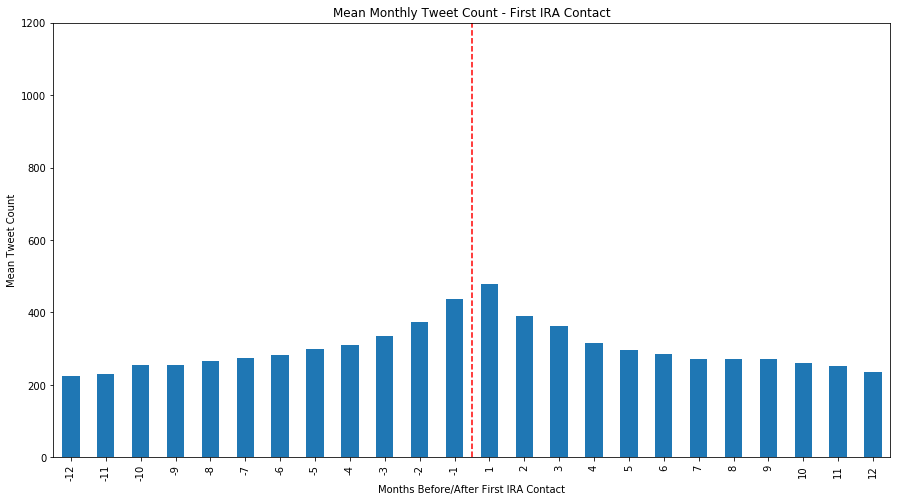

In [53]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_count.mean().plot(kind='bar', figsize=(15,8),
                            title='Mean Monthly Tweet Count - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=1200)
plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfmean1_NONRESPONSIVE.png')
# plt.savefig('BefAfmean1_noresponse.png')
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


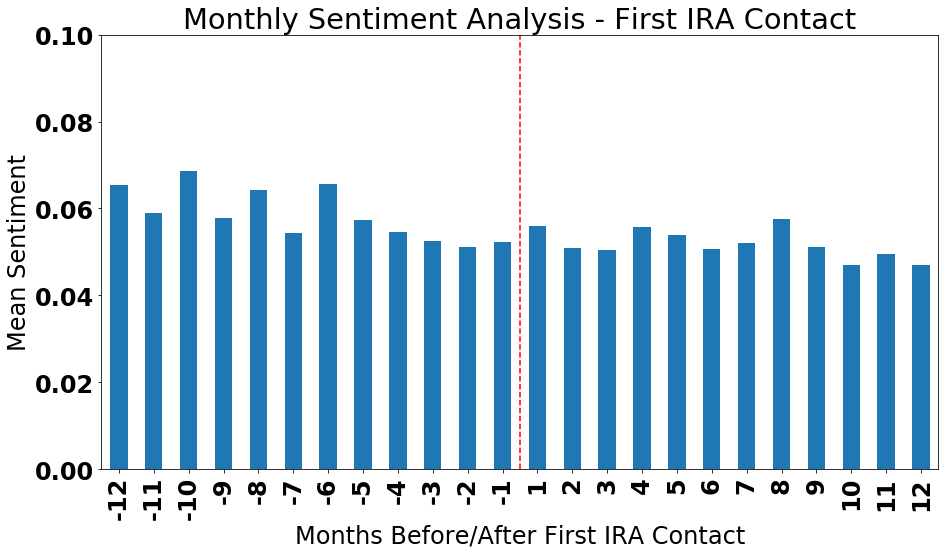

In [54]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Sentiment Analysis - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=0.10)
plt.ylabel('Mean Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfsent1_NONRESPONSIVE.png')
# plt.savefig('BefAfsent1_noresponse.png')
plt.show()

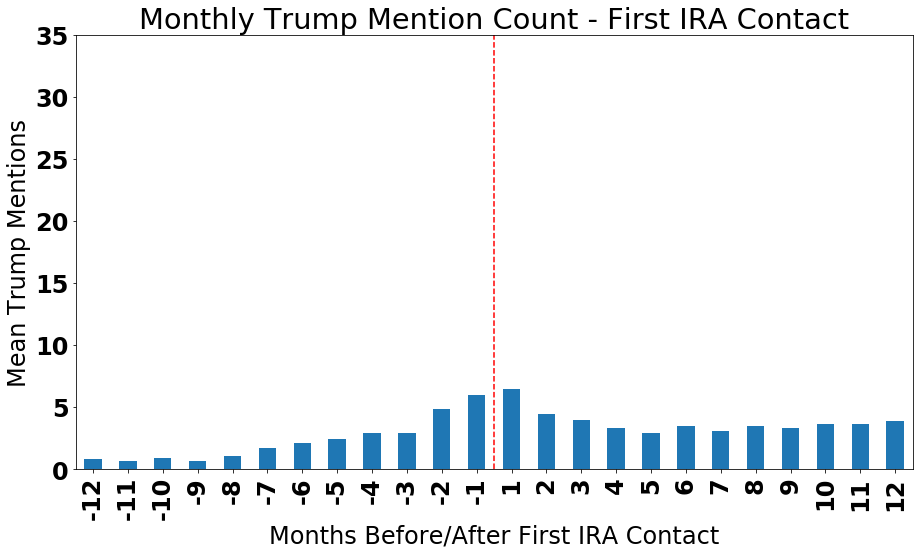

In [55]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_trump.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Trump Mention Count - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

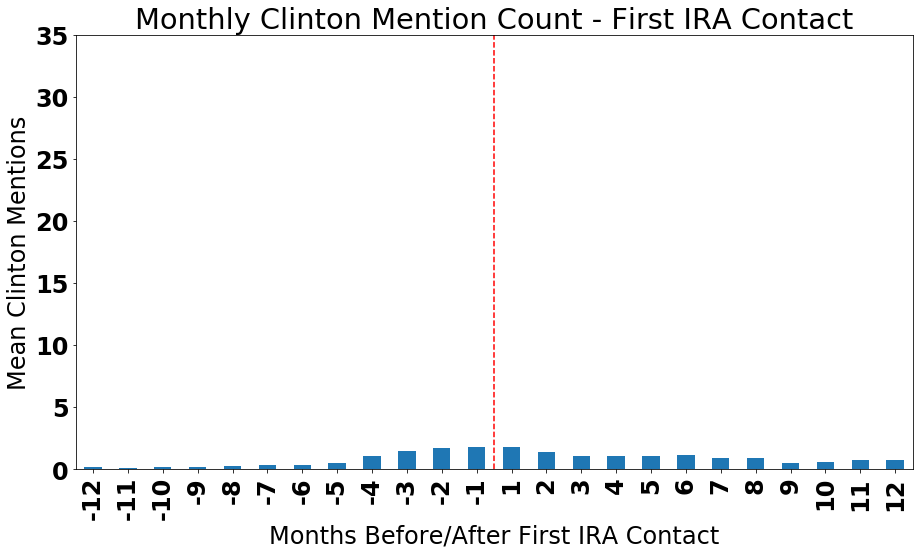

In [56]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_clinton.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Clinton Mention Count - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton1_NONRESPONSIVE.png')
# plt.savefig('BefAfclinton1_noresponse.png')
plt.show()

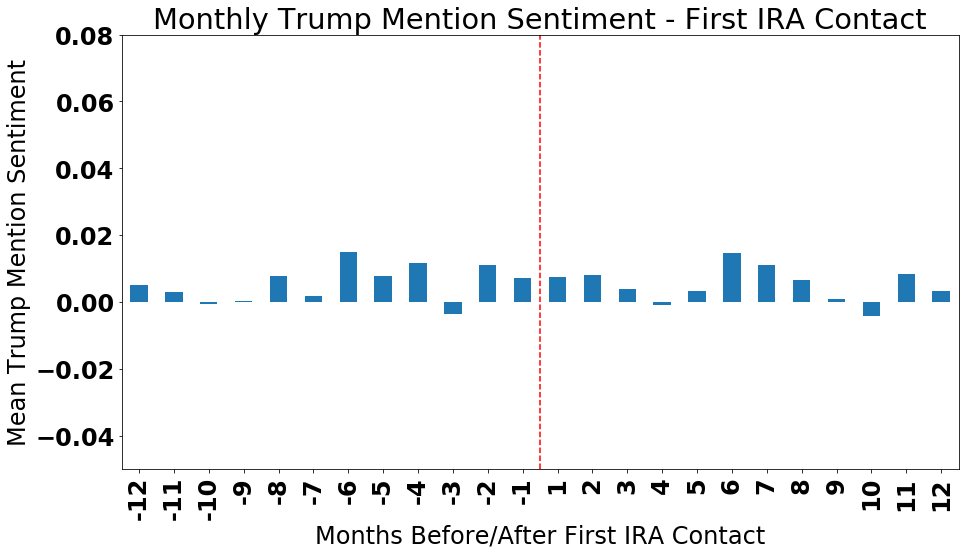

In [57]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_trump_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Trump Mention Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.08, bottom=-.05)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 26}
plt.rc('font', **font)
plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump_sent1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


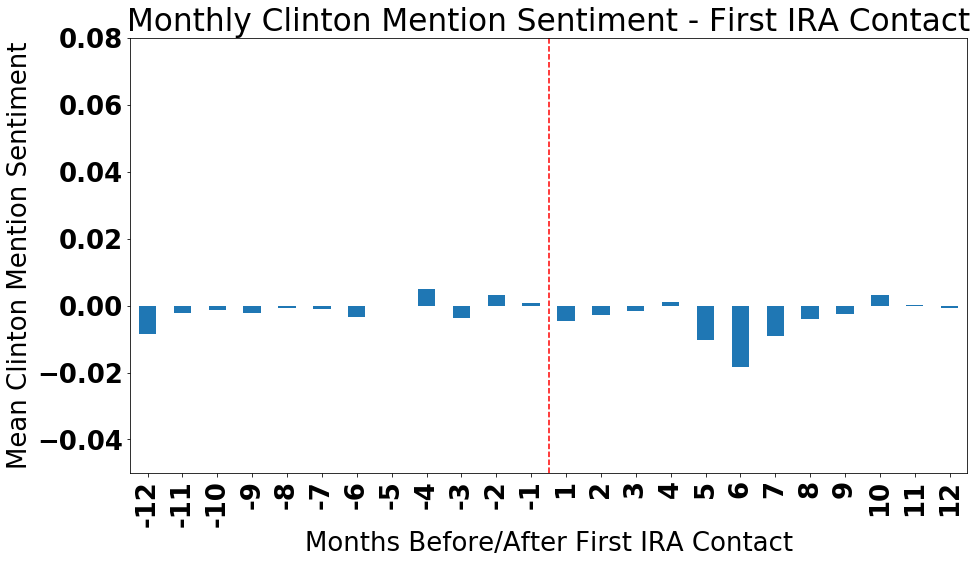

In [58]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_clinton_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Clinton Mention Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton_sent1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

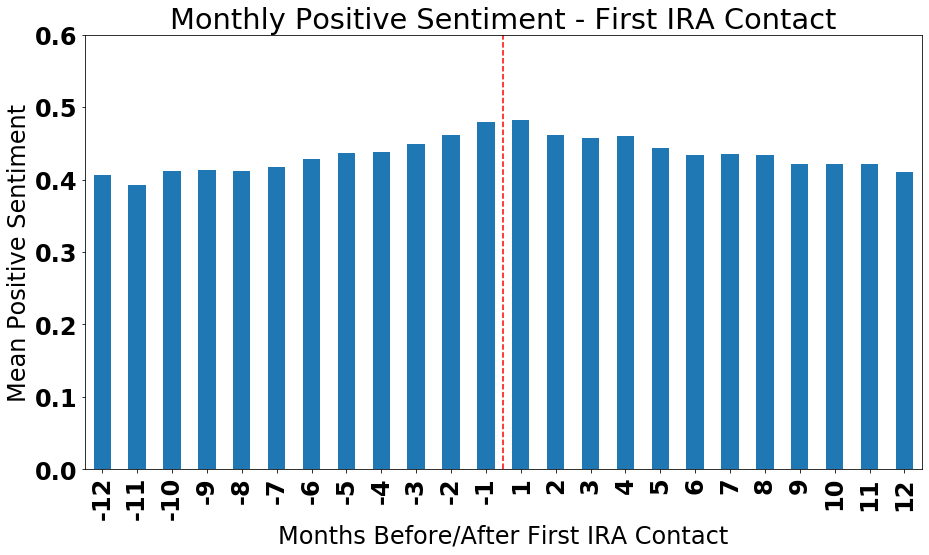

In [59]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_positive_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Positive Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.6)
plt.ylabel('Mean Positive Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfpositive_sent1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

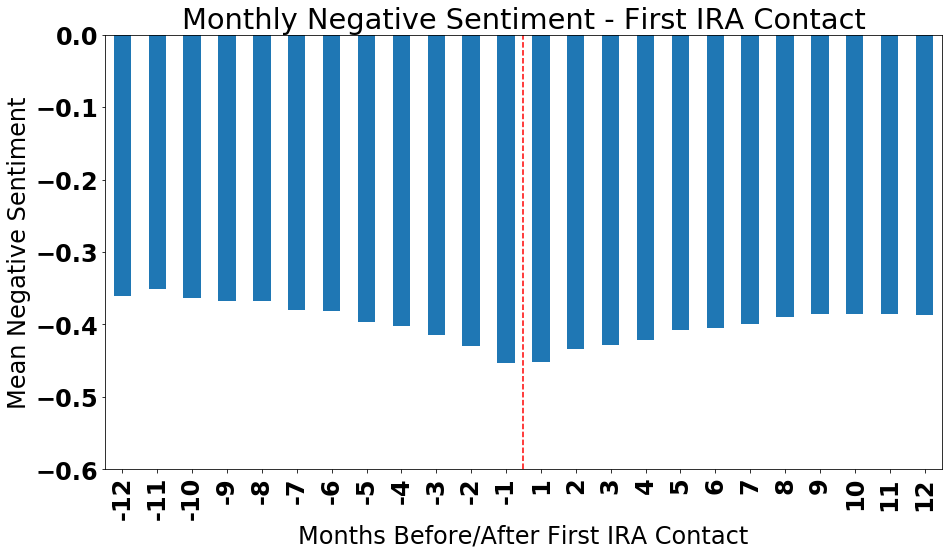

In [60]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_negative_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Negative Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0, bottom=-.6)
plt.ylabel('Mean Negative Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
# plt.savefig('BefAft_V3_DidNotRespond/BefAfnegative_sent1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

**Contact Point Two Plots**

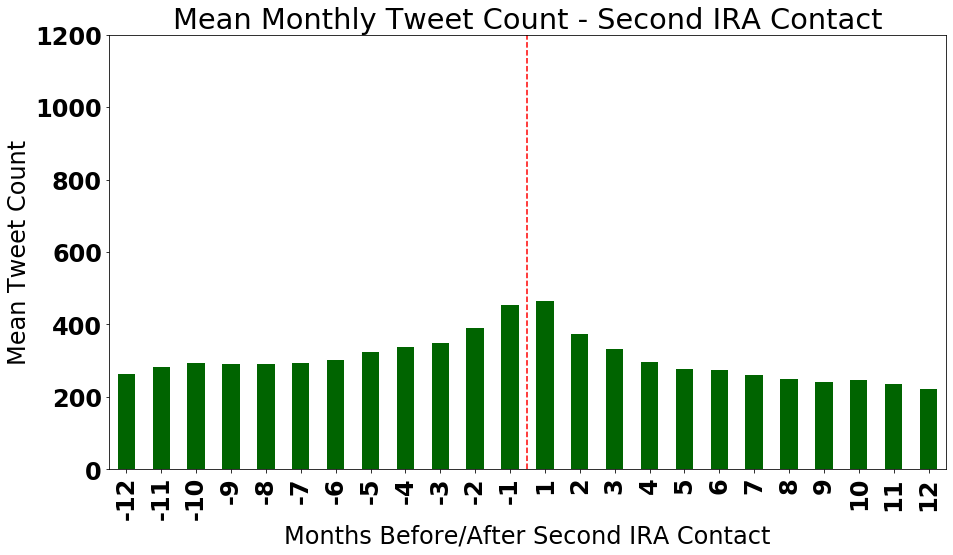

In [61]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_count.mean().plot(kind='bar', figsize=(15,8), color = 'darkgreen',
                            title='Mean Monthly Tweet Count - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=1200)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfmean2_NONRESPONSIVE.png')
# plt.savefig('BefAfmean2_noresponse.png')
plt.show()

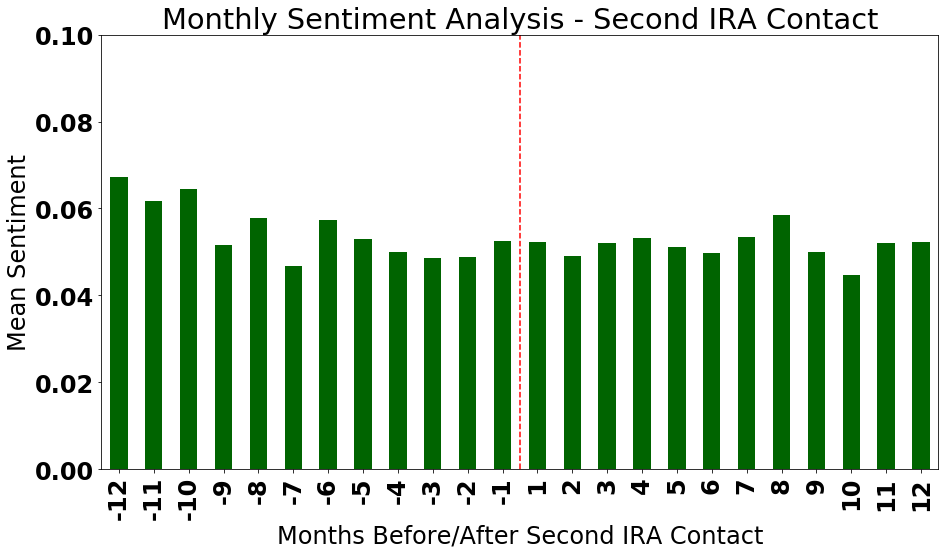

In [62]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_sent.mean().plot(kind='bar', figsize=(15,8), color ='darkgreen',
                            title='Monthly Sentiment Analysis - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0.10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfsent2_NONRESPONSIVE.png')
# plt.savefig('BefAfsent2_noresponse.png')
plt.show()

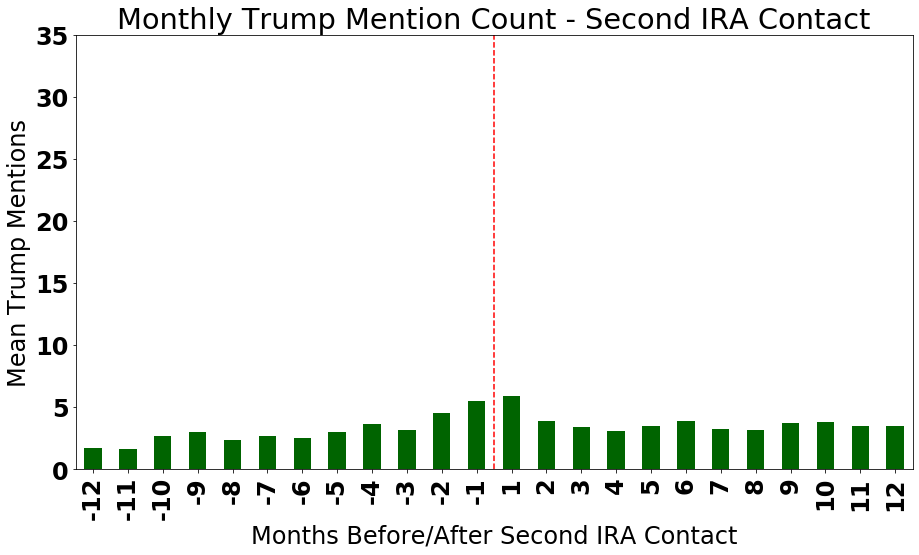

In [63]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_trump.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Trump Mention Count - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump2_noresponse.png')

plt.show()

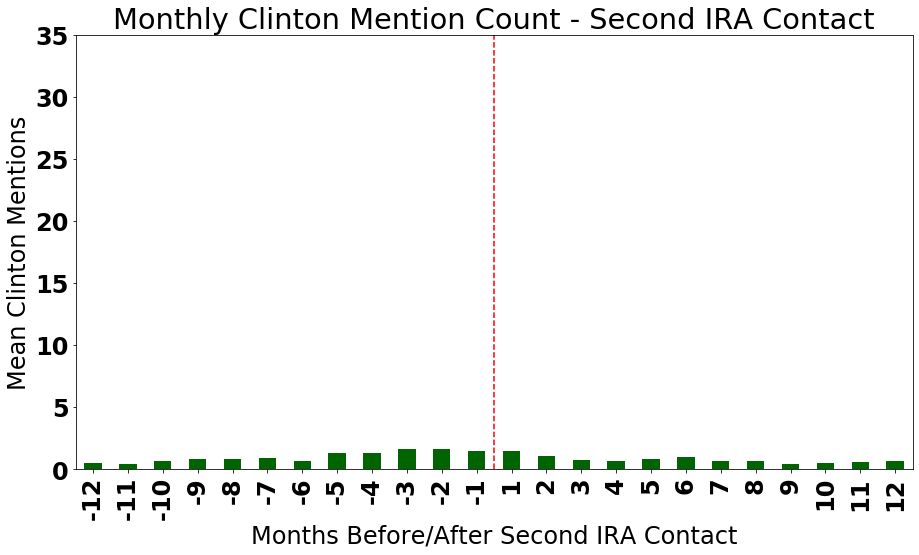

In [64]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_clinton.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Clinton Mention Count - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton2_NONRESPONSIVE.png')
# plt.savefig('BefAfclinton2_noresponse.png')

plt.show()

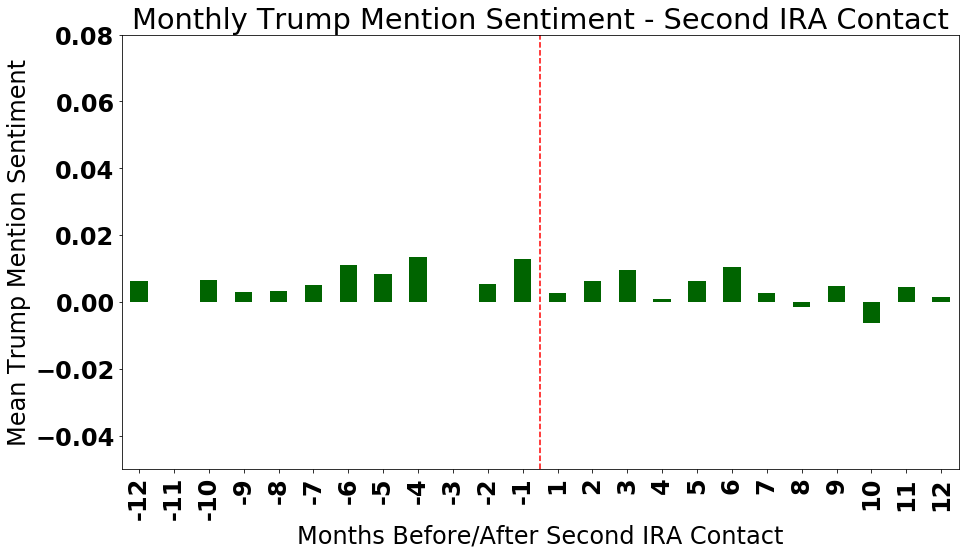

In [65]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_trump_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Trump Mention Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump_sent2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump2_noresponse.png')
plt.show()

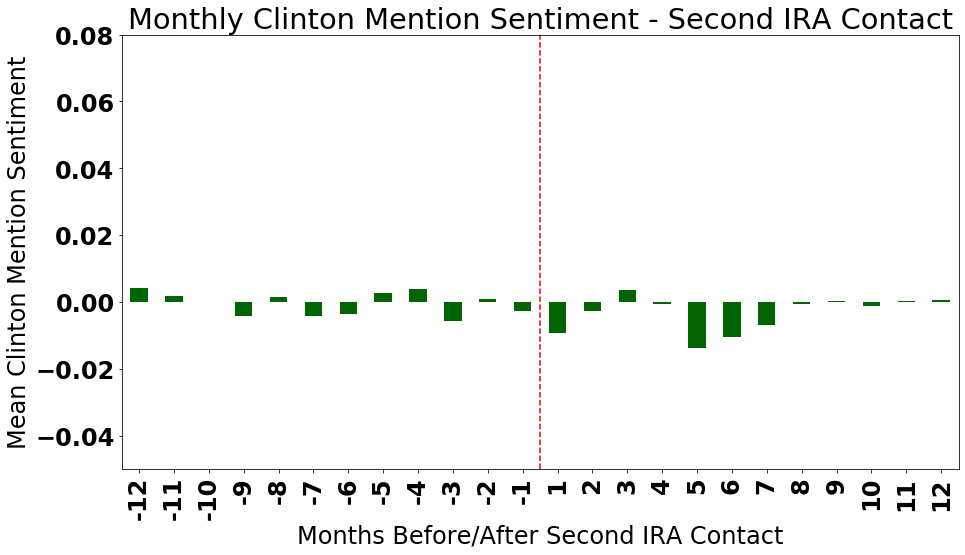

In [66]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_clinton_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Clinton Mention Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton_sent2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump2_noresponse.png')
plt.show()

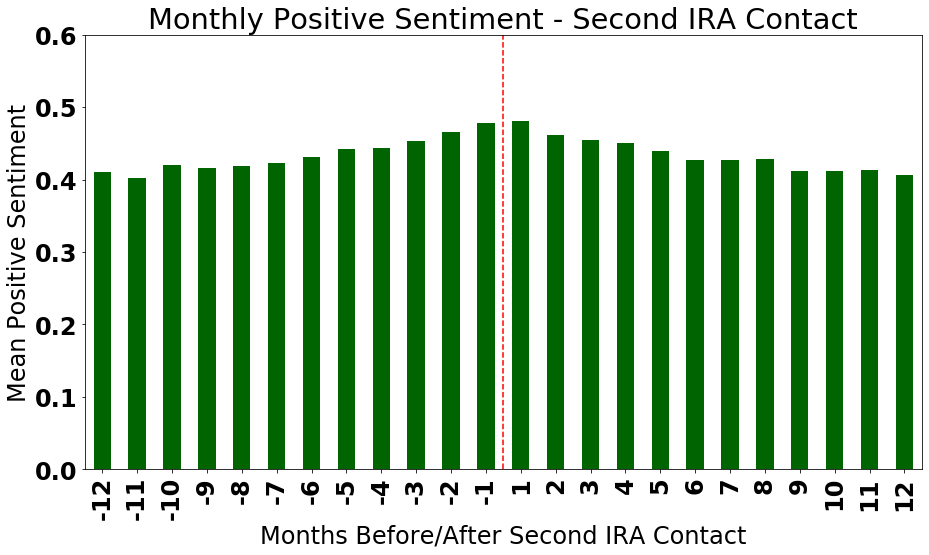

In [67]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_positive_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Positive Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.6)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=.06, bottom=-.05)
plt.ylabel('Mean Positive Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_V3_DidNotRespond/BefAfpositive_sent2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

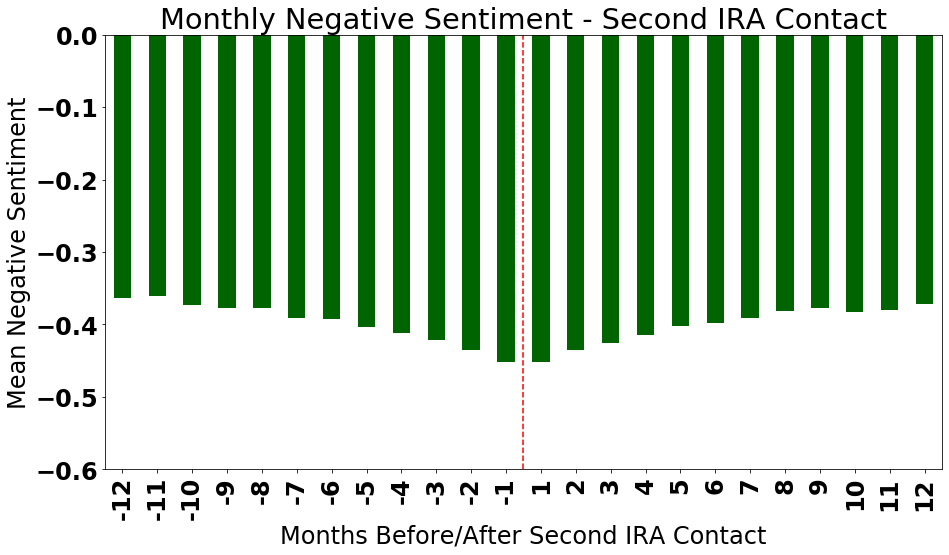

In [68]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_negative_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Negative Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0, bottom=-.6)
plt.ylabel('Mean Negative Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
# plt.savefig('BefAft_V3_DidNotRespond/BefAfnegative_sent2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

**Contact Point Three Plots**

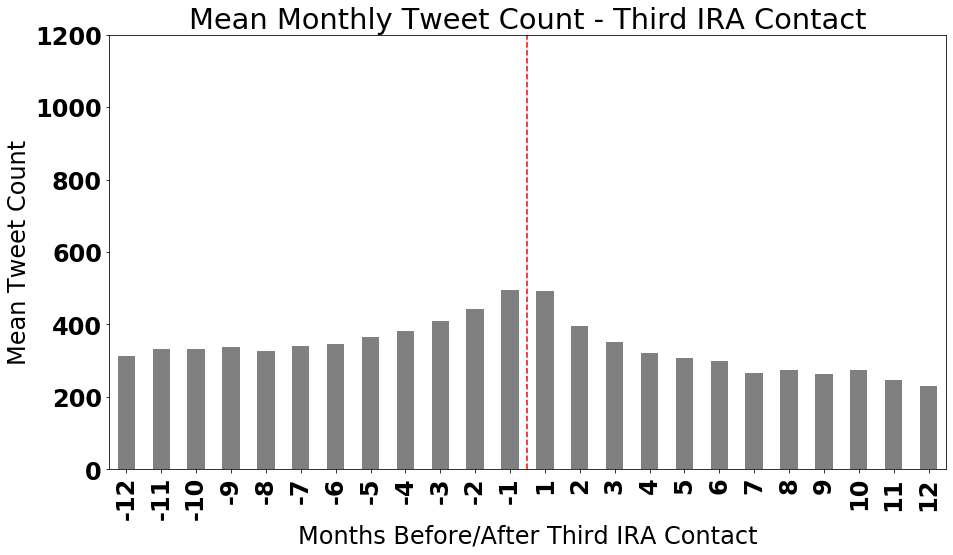

In [69]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_count.mean().plot(kind='bar', figsize=(15,8), color = 'grey',
                            title='Mean Monthly Tweet Count - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=1200)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfmean3_NONRESPONSIVE.png')
# plt.savefig('BefAfmean3_noresponse.png')

plt.show()

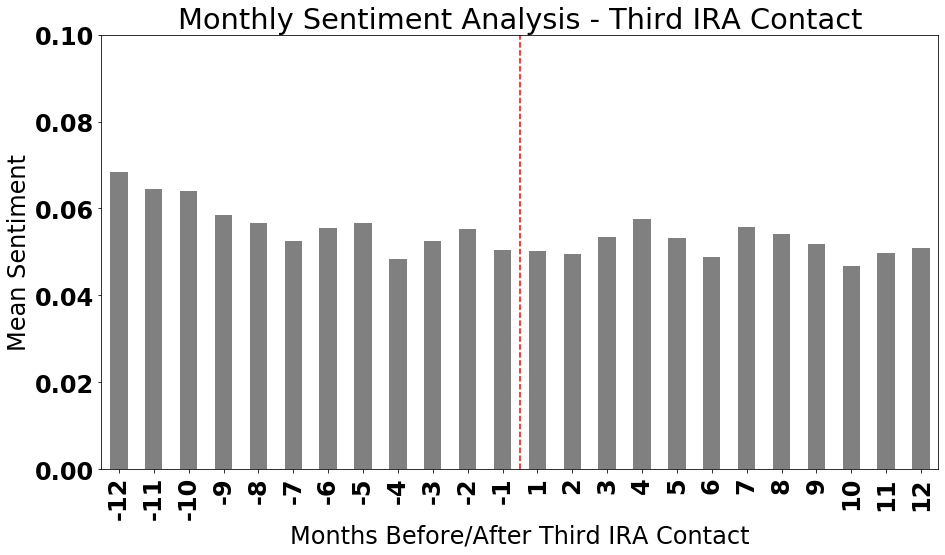

In [70]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_sent.mean().plot(kind='bar', figsize=(15,8), color ='grey',
                            title='Monthly Sentiment Analysis - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0.10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylabel('Mean Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfsent3_NONRESPONSIVE.png')
# plt.savefig('BefAfsent3_noresponse.png')

plt.show()

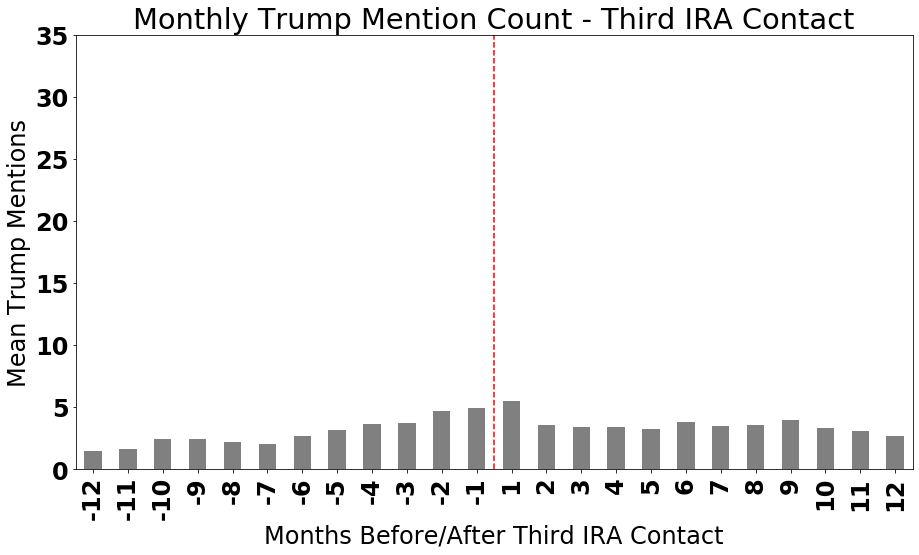

In [71]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_trump.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Trump Mention Count - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump3_noresponse.png')

plt.show()

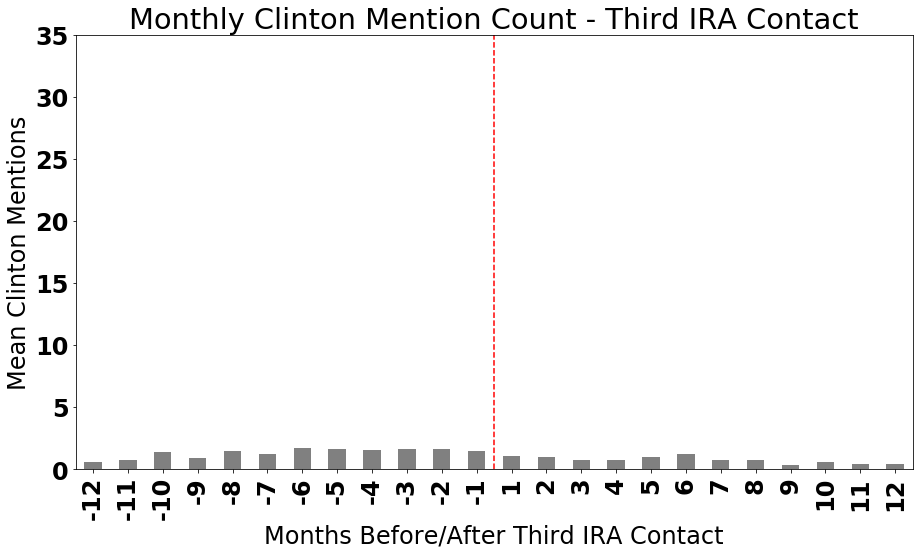

In [72]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_clinton.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Clinton Mention Count - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=35)
plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton3_NONRESPONSIVE.png')
# plt.savefig('BefAfclinton3_noresponse.png')

plt.show()

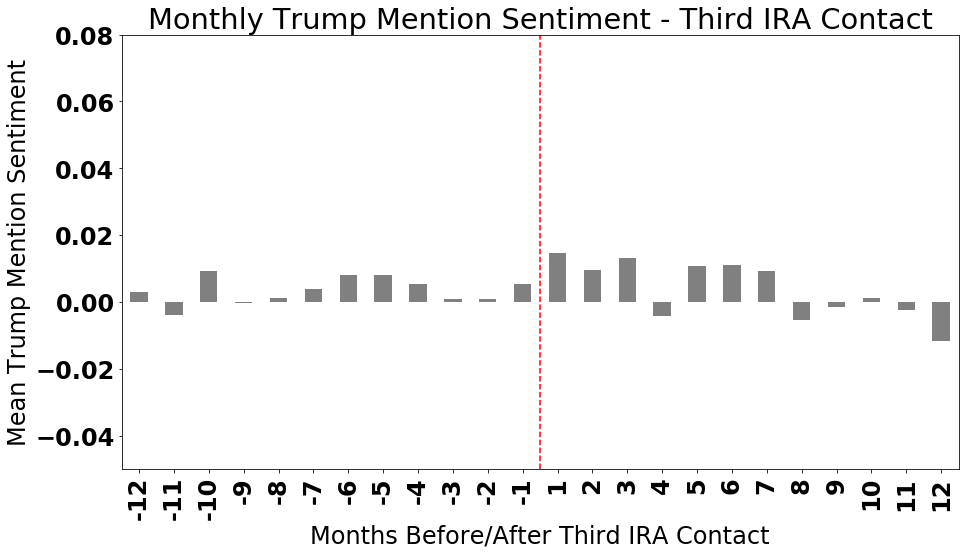

In [73]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_trump_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Trump Mention Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump_sent3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump3_noresponse.png')

plt.show()

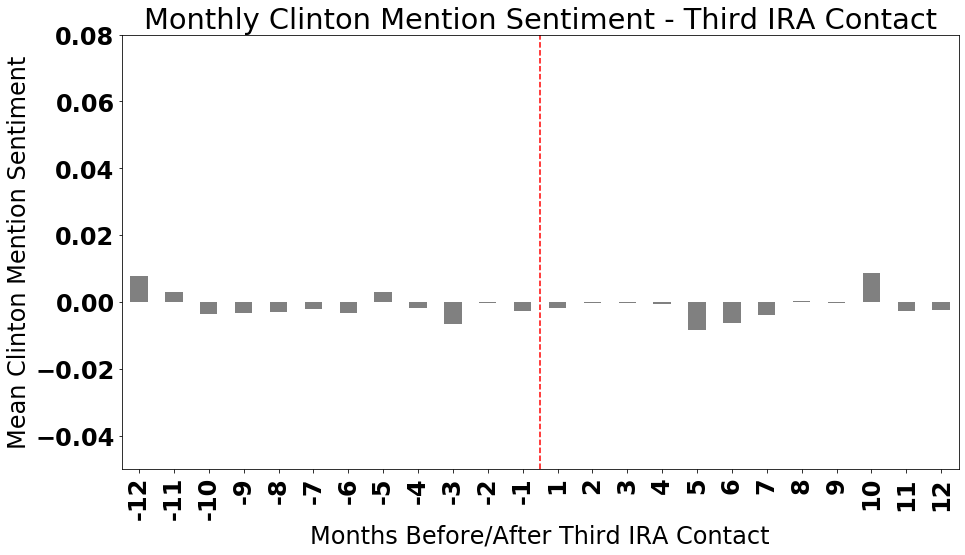

In [74]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_clinton_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Clinton Mention Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
plt.ylim(top=.08, bottom=-.05)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton_sent3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump3_noresponse.png')

plt.show()

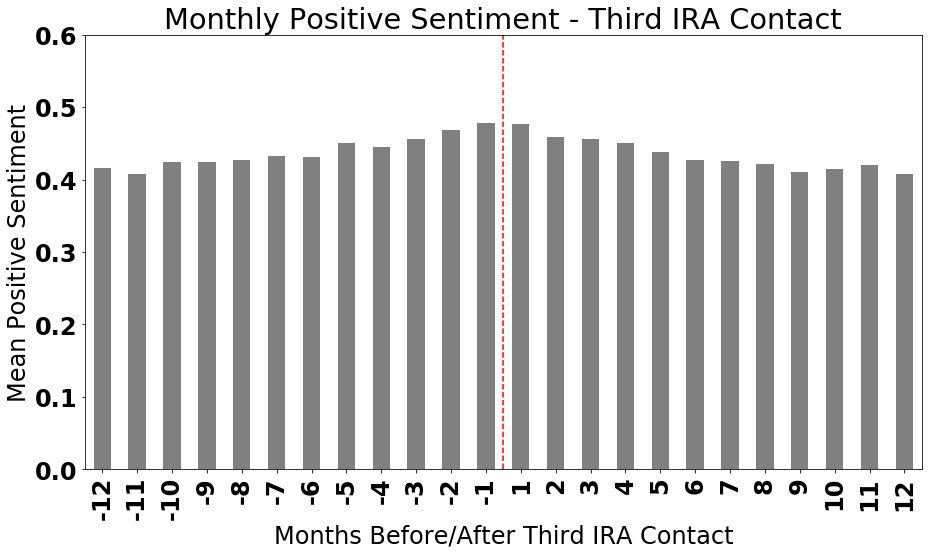

In [75]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_positive_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Positive Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.6)
plt.ylabel('Mean Positive Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_V3_DidNotRespond/BefAfpositive_sent3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

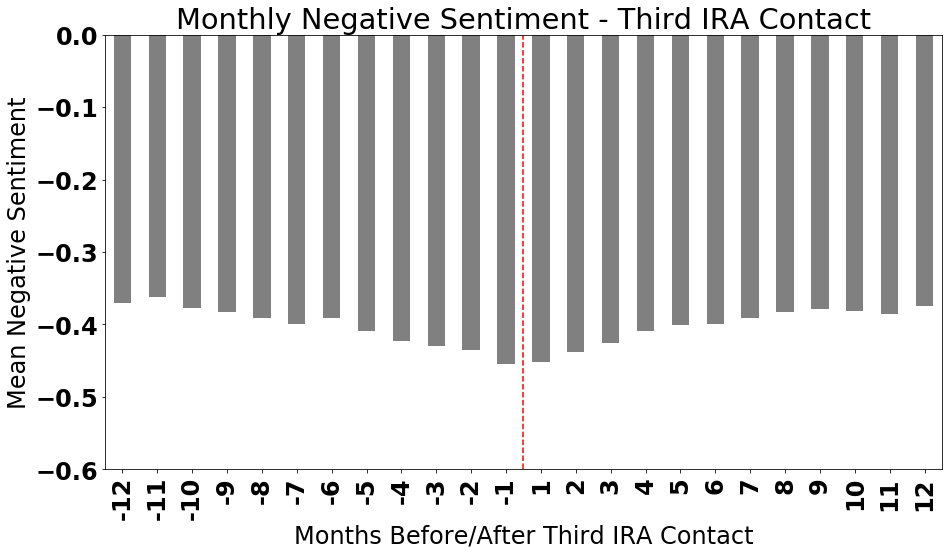

In [76]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_negative_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Negative Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0, bottom=-.6)
plt.ylabel('Mean Negative Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
# plt.savefig('BefAft_V3_DidNotRespond/BefAfnegative_sent3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()


In [77]:
# beforeAfterDF.head()
# befAftCounts.head()

In [78]:
# count = 0
# remove_users = []
# for i in range(len(beforeAfterDF)):
# # for i in range(10):
#     first_contact = beforeAfterDF['first_contact'][i]
#     first_tweety = dt.strptime(first_tweet_dict[beforeAfterDF['username'][i]], "%Y-%m-%d")
#     if first_tweety >= first_contact:
#         remove_users.append(beforeAfterDF['username'][i])
# #         print(beforeAfterDF['username'][i])
# #         print(first_tweety)
# #         print(first_contact)
#         count += 1
# print(count)
    

In [79]:
# removeDF = pd.DataFrame(remove_users)

In [80]:
# removeDF.columns = ['username']

In [81]:
# removeDF.head()

In [82]:
# removeDF.to_csv('removeUsers_DidNotMentionBackUsers.csv')